# Nilearn: Neuro-Imaging Plotting Tools in Python
by Anton Leontyev and Charles Zhang

In [1]:
from nilearn import plotting
from nilearn import datasets
from scipy import stats
from nilearn import image
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/Users/agleontiev/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Plan:    

    1)Fetching the data; introduction to fMRI terms
    2)Anatomical images
    3)Plotting activation maps on the brain
    4)Plotting a connectome
    5)EPI images
    6)Saving to a file
    
<img src="files/image.jpeg">

## fMRI data


For these examples, we will use fMRI scans, collected from anonymous participants peforming different tasks.

BOLD contrast imaging - Blood-oxygen-level dependent contrast imaging; imaging the differences in magnetic fields brought by influx of blood to a certain area (blood has ferromagnetic properties).

Statistical map - map of activity in different voxels (volume units of the brain).

Threshold - intensity threshold for the basic signal level.



In [2]:
#Fetch the dataset
# localizer dataset to have contrast maps
subject1 = datasets.fetch_localizer_button_task()
subject1_tmap = subject1.tmaps[0]
#atlas 
atlas = datasets.fetch_atlas_msdl()
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']
# functional dataset
func1 = ("/Users/agleontiev/Data for plotting/func.nii")
#anatomical image
anat_example = ("/Users/agleontiev/Data for plotting/anat.nii")

### Anatomical images

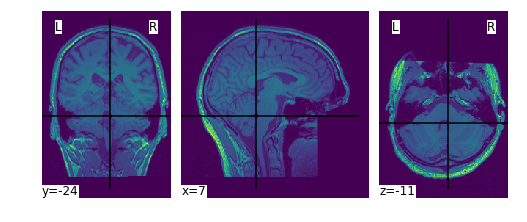

In [39]:
plotting.plot_img(anat_example)

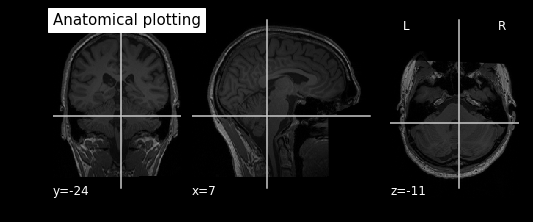

In [4]:
plotting.plot_anat(anat_example, title="Anatomical plotting")

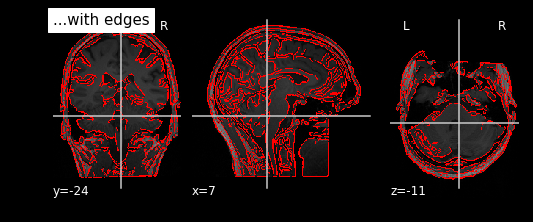

In [5]:
display = plotting.plot_anat(anat_example, title="...with edges")
display.add_edges(anat_example)

### Plotting activation maps on the brain

Nilearn has abilities to plot in many different modes. These different modes are specified through the argument “display_mode”. Possible values are ‘ortho’, ‘x’, ‘y’, ‘z’, ‘xz’, ‘yx’, ‘yz’, ‘l’, ‘r’, ‘lr’, ‘lzr’, ‘lyr’, ‘lzry’, ‘lyrz’.  

‘x’ - sagittal, ‘y’ - coronal, ‘z’ - axial, ‘l’ - sagittal left hemisphere only, ‘r’ - sagittal right hemisphere only, ‘ortho’ - three cuts are performed in orthogonal directions.

Another argument is transparency (indicated by alpha - a float from 0 to 1). This is in charge of brain schematics transparency.



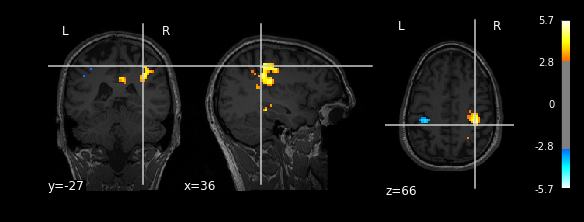

In [6]:
plotting.plot_stat_map(subject1_tmap, bg_img=anat_example, threshold=3, cut_coords=[36, -27, 66])

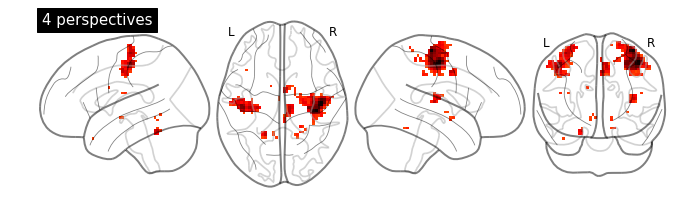

In [7]:
#saggital left hemisphere, axial, saggital right hemisphere, coronal
plotting.plot_glass_brain(subject1_tmap, title='4 perspectives', display_mode='lzry', threshold=3, alpha = 0.5)

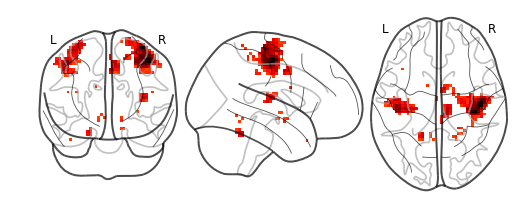

In [8]:
plotting.plot_glass_brain(subject1_tmap, threshold=3, display_mode = 'ortho')

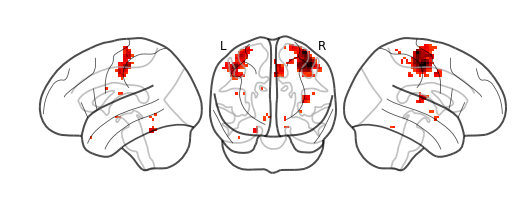

In [9]:
plotting.plot_glass_brain(subject1_tmap, threshold=3, display_mode = 'lyr')

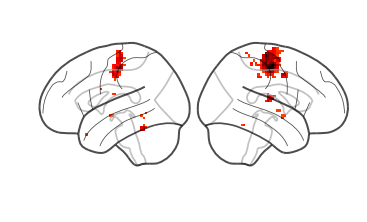

In [10]:
plotting.plot_glass_brain(subject1_tmap, threshold=3, display_mode = 'lr')

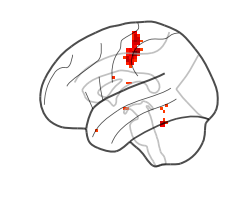

In [11]:
plotting.plot_glass_brain(subject1_tmap, threshold=3, display_mode = 'l')

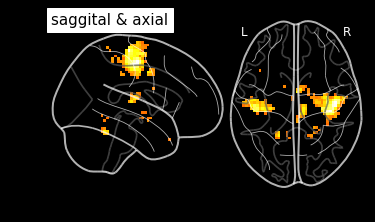

In [12]:
plotting.plot_glass_brain(subject1_tmap, title='saggital & axial', black_bg=True, display_mode='xz', threshold=3)

Let's add the colorbar:

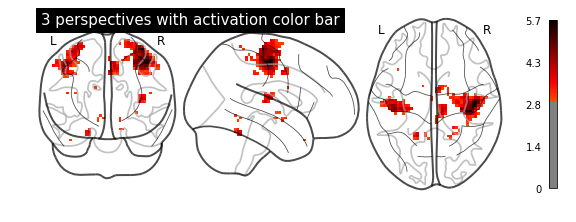

In [13]:
plotting.plot_glass_brain(subject1_tmap, display_mode = 'ortho', threshold=3, colorbar=True, title = '3 perspectives with activation color bar')

Plot_abs is a little tricky. This argument is describing how you want to handle the activation. If True, projection of the absolute value will be used (rendering positive and negative values in the same manner). If False, then the sign of the maximum intensity will be represented with different colors.

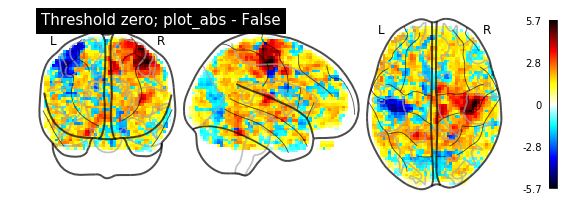

In [14]:
#plot_abs is set to 'False'.
plotting.plot_glass_brain(subject1_tmap, threshold=0, colorbar=True, plot_abs=False, title='Threshold zero; plot_abs - False')

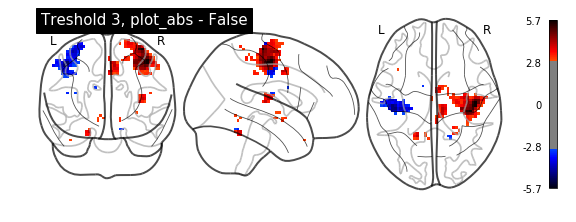

In [15]:
plotting.plot_glass_brain(subject1_tmap, threshold=3, title ='Treshold 3, plot_abs - False', colorbar=True, plot_abs=False)

If we want to plot the contours of our activation regions, we first have to initialize the image, and THEN add countours.

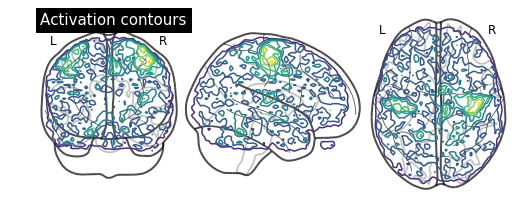

In [16]:
display = plotting.plot_glass_brain(None)
# Here, we project statistical maps
display.add_contours(subject1_tmap)
# and a title
display.title('Activation contours')

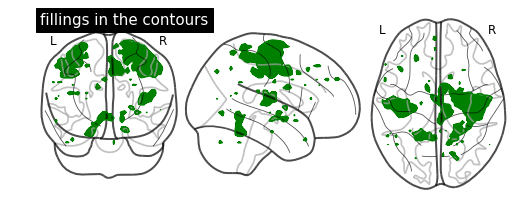

In [40]:
display = plotting.plot_glass_brain(None)
# Here, we project statistical maps with filled=True
display.add_contours(subject1_tmap, filled=True, levels =[2.5], colors = 'g', alpha = 1)
#levels denote the level of activation. if set to zero, everything will be colored
display.title('fillings in the contours')

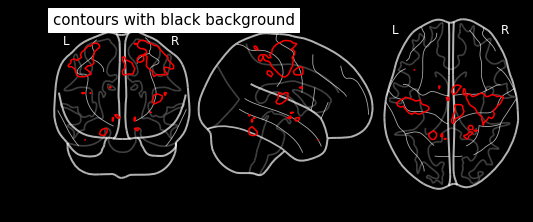

In [19]:
display = plotting.plot_glass_brain(None, black_bg=True)
display.add_contours(subject1_tmap, levels=[3.], colors='red')
display.title('contours with black background')

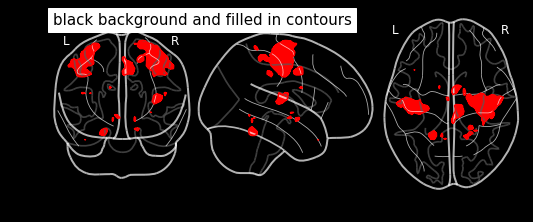

In [20]:
display = plotting.plot_glass_brain(None, black_bg=True)
display.add_contours(subject1_tmap, filled=True, levels=[3.], colors='r', alpha = 1)
display.title('black background and filled in contours')

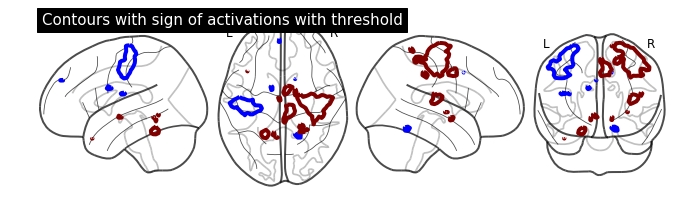

In [21]:
display = plotting.plot_glass_brain(None, plot_abs=False, display_mode='lzry')
# In add_contours,
# we give two values through the argument `levels` which corresponds to the
# thresholds of the contour we want to draw: One is positive and the other one
# is negative. We give a list of `colors` as argument to associate a different
# color to each contour. Additionally, we also choose to plot contours with
# thick line widths, For linewidths one value would be enough so that same
# value is used for both contours.
display.add_contours(subject1_tmap, levels=[-2.8, 3.], colors=['b', 'maroon'], linewidths=4.)
display.title('Contours with sign of activations with threshold')

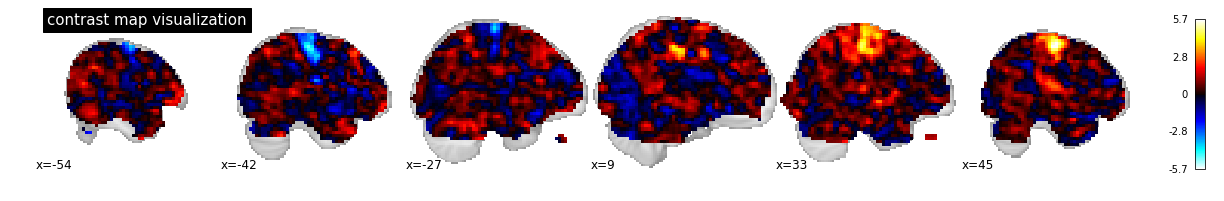

In [22]:
plotting.plot_stat_map(subject1_tmap, display_mode='x', cut_coords=6, title="contrast map visualization")data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABMgAAADJCAYAAADW3Q65AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsnXl4VEXWxt8AQSCEJQTC0kCDIAq4somCfIyCDI4CsqigLKJsjsqAOjrjCB/oqChjQEF2lH1HBFyAMSqIRqPgTETzoSGOAWlgIhgSkC3fH03deuvmVhYN6XRyfs/DQ/XNXerWPbX07fOeE5GTk5MDQRAEQRAEQRAEQRAEQSijlAt1BQRBEARBEARBEARBEAQhlMgLMkEQBEEQBEEQBEEQBKFMIy/IBEEQBEEQBEEQBEEQhDKNvCATBEEQBEEQBEEQBEEQyjTygkwQBEEQBEEQBEEQBEEo08gLMkEQBEEQBEEQBEEQBKFMIy/IBEEQBEEQBEEQBEEQhDJNhVBXoDDUrVsXgUAg1NUQhLAkLi4OBw8eDHU1BEEQBEEQBEEQBKHEEZGTk5MT6koUlIiIiFBXQRDCmjDq7oIgCIIgCIIgCIJQbIjEUhAEQRAEQRAEQRAEQSjTyAsyQRAEQRAEQRAEQRAEoUwjL8gEQRAEQRAEQRAEQRCEMo28ICsE3bp1w8MPP1ys12zevDkmTJiA6tWrF+t1i5sJEybg8OHDIbn2woUL8dlnnzmfhwwZgpycHERFRRXZNSIjIzFhwgRceeWVxvbGjRsjJycHt9xyS5FdSxAEQRAEQRAEQRCEwiEvyApB9+7dMXbs2GK95iWXXIKJEyeiRo0axXrd4mbevHm4+eabQ10NAMDmzZtx7bXXIjs7u8jOWbFiRUycOBFXXXWVsf3HH3/Etddeix07dhTZtQRBEARBEARBEARBKBwVQl2B0ki5cuVQvnx5nD59OtRVCRv279+P/fv3h7oaAIAjR47gyJEjxXKtU6dOITExsViuJQiCIAiCIAiCIAhFjd/vR3R0NMqXL48KFSogKSnJ+PsLL7yApUuXAgDOnDmDr7/+GocPH0ZMTEwoqmulVHiQde7cGe+99x4yMzNx9OhRJCQkGJ46V155JbZt24asrCxkZGRgyZIlqFOnjvN3JXPr378/Zs2ahaNHj+KHH37AxIkTERERASAoAXzkkUfg9/uRk5ODnJwcLFy4EICW6PXq1QvJyck4efIkOnTogLp162L+/Pn47rvvkJ2djZSUFEyePBmRkZFG/R9//HHs3bsXJ06cwMGDB/H2228jLi4OXbp0waZNmwAAaWlpyMnJwb59+6ztoOrRs2dPfPXVV8jKysKmTZtQs2ZNXHzxxXjvvfdw/PhxfPbZZ7j88suNY8eNG4dPP/0UR48excGDB/Hmm2/i4osvNvZJSEjA6tWrcf/992Pfvn3Izs7Gpk2bUL9+fWudVHv17NnT2F6uXDn8+OOPmDx5stO+LLGsUKECXnjhBXz//fc4efIk9u/fj3Xr1jltZ5Nk5uTk4IEHHnA+33PPPdi+fTv++9//IiMjA++99x7atGljrS+QW2K5cOFC55nzv4SEBABAlSpV8PLLL+Obb75BVlYWUlNT8corryA6Oto55/HjxwEAr732mnN848aNPSWW5cqVw4QJE5x7T05Oxl133WXUUT3rm266CV9++SWOHz+O7du3o2XLlnnemyAIgiAUNUuWLMGSJUuwatUqrFq1CuvWrcO6deuwdu1arF271vn7kiVLQl1VQRAEQRAuEAkJCdi9e3eul2MA8Oijj2L37t3YvXs3nn32WXTp0qXEvRwDSoEHWZcuXbB161YkJCRgyJAhyMrKwvXXX48GDRpg9+7diI2Nxfvvv4+vv/4aAwcORNWqVfHcc89h69ataNu2reHlNWXKFKxduxb9+vXDjTfeiAkTJuCrr77C6tWrMW/ePDRv3hy/+93v0KdPHwAwXtD4/X5MmTIFkyZNwsGDB7Fv3z7Exsbi6NGjePTRR3HkyBFHLlm7dm2MGjUKQPAFzl/+8hf8+c9/xldffYVatWrhd7/7HaKiovDFF19g/PjxmDp1Kvr06YMff/wRv/zyS57t0ahRI0yaNAlPPvmk8+Jmzpw58Pv9mDt3LqZMmYJnn30WK1asQKtWrZzjGjZsiFdffRVpaWmoWrUqRo0ahZ07d6J58+b4+eefnf06duyIFi1aYNy4cahUqRKef/55vPHGG2jfvr1nfdLS0pCYmIgBAwbgrbfeMp5b3bp1sWLFCs/jnnjiCQwaNAiPP/449u3bh7p166Jnz56F9sxr0qQJli5dir179yIyMhJ33XUXtm/fjlatWuX5spGZPHkyZs2a5XyuW7culi9fjv/7v/8DEHxBFhkZiaeeegoHDx5Ew4YN8de//hWrV69Gjx49AABdu3ZFQkICJk+ejM2bNwMIyivr1auX63qTJk3CY489hv/93//FZ599hr59+2LZsmXIyckx2qtRo0Z44YUX8Mwzz+DEiRN48cUXsXLlylwvPwVBEAThQrB69WoAcOaymjVrAgAqVaoEAM6PjJmZmc4xK1euNLbVrFkTO/r1c/7egM7f4cMPceLECQDAyZMnAcD5nJWVZfz/4IMPFtFdCYIgCIJwIVm+fHkuB5CSQti/IHv22Wfx5ZdfGvGr3n33Xac8fvx4AMDNN9/sLMb27t2LxMRE9O3b13jh8OGHH+KRRx4BAGzbtg09evTA7bffjtWrV2P//v3OCyovSVxsbKzjzaPYv3+/c30A+Oijj5CVlYUFCxbgwQcfxOnTp9G+fXts2bIFr776qrPf+vXrnXJKSgoAYNeuXfj+++/zbY+YmBh07NgRqampAIArrrgCjz32GAYPHozFixcDCC5Y33rrLVx66aX45ptvAAB/+tOfnHOUK1cOW7duxaFDh9CrVy/nOACoU6cOOnbsiB9++AEA8P333+Ojjz7CzTffbLQ7s2LFCkyYMAEVK1bEqVOnAAB33HEHkpOT8dVXX3ke0759eyxbtgyLFi1ytqmFeGGYNGmSU46IiMDWrVvRvn173H333Y73Wn6kpqY67VmhQgUkJCTg22+/ddrsyJEjzgtPAChfvjz27duHjz76CA0bNsQPP/zgJAH47rvv8pRU1qxZE2PHjsXTTz+NZ555BgCwZcsW+Hw+TJw40bDXmJgYXH/99fj2228BBJ/bG2+8gRYtWjh2IwiCIAiCIAiCIAgXkoiICNx0000oX748Ro4ciREjRnjul52djXfeeQevvPJKMdewYIT1C7IqVaqgQ4cOeWaWVC+g+NfLTz/9FPv27UOnTp2MFw5btmwxjt2zZw8aNWpUoLqkp6cbL8cUDz/8MEaMGIEmTZqgcuXKzvZGjRrhu+++w+7duzF8+HBMnDgRmzdvxueff45z584V6JpepKWlOS9zADgvT957771c2xo0aOC8IOvQoQMmT56Ma665BrVq1XL2veSSS4zzf/HFF87LMQDYuXMnAoEA2rdvb31BtmrVKkydOhU9evTAm2++ifLly+P222/H9OnTrfexe/dujB49GoFAAO+88w7+/e9/F7QJDC699FL8/e9/x3XXXYe4uDjrfRWU6dOno3Xr1mjbtq0RxP/uu+/GuHHj0Lx5c1StWtW4DrdXfrRu3RpRUVG5XgauXLkSr7/+OmJjY534aGlpac6zBIL2CgA+n09ekAlCCeCll14CAEcaXrFiRQDBF+0AcPbsWQAwvGLLly9v/K/mA/XjQrly5Yz/z5w5AwD44x//eIHuQiiLqLWRms+qVKkCQHuEKa8t9Xe1blBSCWXzym7V/oDuByqMQ926dWFLUxMXF+d4jilbz8nJMc6p5sS5c+cCgONpr/rImDFjCn7jgiAIgiD8Knbs2IEGDRrg0KFD6NatGy699FLccMMNufbbuHEjrr/++gLJK3v06FGg2OCxsbF45513flW93YT1C7KaNWs6saxs1KtXz9NLKRAI5HooR48eNT6fOnXKkQnkRyAQyLVt7NixeOGFF/D888/jgw8+wE8//YR27dph5syZznkXLFiA6OhojBgxAhMmTMCRI0cwa9YsTJgw4Ve9KPO6B/d2tU3VoWHDhtiyZQs+/fRTjBw5EgcOHMCpU6ewefPmXPd/6NChXNc8dOiQp1RQceDAAezYsQN33HEH3nzzTdx4442oXbu2VV4JAE8//TTOnTuHMWPGYMqUKUhPT8cLL7yQ50s1N1WrVsWWLVsQCAQwbtw4J6bXvHnzCvxcmXvvvRcjR45Er1698N133znbe/fujcWLF2PmzJn4y1/+goyMDNSrVw9vvPFGoa+j2tFtT+pzTEyMM0jYnvWvuTdBEARBKCw/nY8v+hOAt2g7/1yYDO8FcFdkOGWOzMr5o6e3aGEcs4jKmZhInzgW6idOKQ5LMel8XNKD51+sCYIgCIJQ9DRoEAySUKdOHfTp0weffvqp5wuyFStWFFheeeTIEc94Zm7atm1buMrmQVi/IPvpp59w9uzZPF/O/Pjjj0ZAfkVcXBw+//zzIqtLjsfCq3///lizZg2efPJJZ5s7iHpOTg7i4+MRHx8Pn8+HQYMG4ZlnnkF6ejpmz55dZPXLix49eqBKlSro1auX4xVVvnx5z7e6Xm1Zp06dPF9SAkEPqOeeew6VKlXCHXfcgS+++MLwfnLzyy+/YMKECZgwYQKaNWuGUaNGYdq0aUhJScG7776LkydPOr9CK2rUqGF87tixIxo2bIhu3boZHlXVq1fPs65etG/fHjNmzMDkyZOdxAmK/v3745NPPjGSA3gNBgVBtWOdOnWQkaG/PCjvN94mCEJoUdJ45VWjftRQ/yvvGpWwQ3nZKG9i5QHD8SzV36pVqwZAzy0//fQTAO3Jw0lAAODtt982zqliR6oxXTzMhIKwZs0aAEFPZEDPq8qjUXlz5RcPtSTy/vvvO/1J3YdKoKP6jYpvNnr06BDUUBAEQRDCk6ysLJw7dw7R0dHIysrCli1b8NRTT+Xa79ixY/jggw8KkbTnLICj+e5VlIR1Fsvs7GwkJiZi8ODB1n0SExNx8803G7K3tm3bokmTJtixw+bU701hPMqA4Bcd9yJy0KBB1v3T09Px/PPP49tvv3VepBWHV1DlypVx7tw5R74AAAMGDMiVbRMArrnmGjRs2ND5rKSLn376aZ7XWL16NSpXrow+ffqgT58+eXqPufn222/xyCOP4OTJk067pKeno1q1akYGze7du+e6L8BcyHfs2BFNmjQp8LWB4MuptWvXYtu2bZg4cWKuvxfkORf0OSYnJyMrKwv9+/c3tg8YMAApKSkFcjEVBEEQBEEQBEEQhOIgEAigU6dOuPLKK9G+fXvccsst6NGjB2bNmmUku1u/fj26d++OqKioAp5ZvSDL71/REdYeZADw+OOPY9u2bXj77bcxZ84cZGVloWPHjkhKSsLmzZvxj3/8A6NHj8a7776L559/3sli+a9//Qtr164t1LW++eYb1K1bF0OGDEFycjKOHDmSZ+D8rVu34qGHHkJiYiK+++47DBo0CM2aNTP2mTVrFjIyMvDJJ5/g2LFj6Nq1K5o3b44///nPAHSQ/pEjR2LFihXIzs5GcnJyIVspb9577z2UL18eCxcuxPz589GqVSs88sgjjscCc/jwYWzevBkTJkxwslh+/vnn1vhjfNz777+PF198ETVr1sSqVavy3H/dunX4/PPPsWvXLpw4cQL9+vVDhQoV8OGHHwIA3nnnHWRnZ2PBggWYOnUqmjRpYgTKB4BPPvkEmZmZTvZOFeg+PT29UO2zaNEiREdH45VXXkGHDh2c7T///DO+/vprbN261ZFXJiYmomfPnrjxxhuNc5w+fRqpqakYMGAAkpOTcfLkSfzrX//Kda2ffvoJ8fHxePLJJ3HmzBkkJSXh9ttvxy233II777yzUPUWBKFoUBO72wNM/VigvE/UmKk8yEaMGE9nuYnKXahcH8BF58sHaDtN9n0n6PKQ8/9nAtjmquj0zwDEnv8wif7wAR588C8AgPj4YHIS5RHEnriq3u6xVCh9qOQ76pkre2jcuDEAoHbt2gCAiy4K2uZ++mHpelIx8CqBrdeMyFqFys2dUgJ4ccye3R84pT/AnK9ZQJGAefRJ23F36Dis7AfWsmtXp8y5sLOonHreE1Nl2jx27BgA/UObZMos/cyZMweA9tZVY6SKGam8DNUPnxUrVsQfhg93jtclgDUjz/elD9dR+TAMFrdc5NideP4KghAuNG3a1DMeu3tNOXToUAwdOrQQZz4L4NhvqlthCWsPMgDYvn07unXrhipVqmDJkiVYuXIlunTp4rwEOXLkCLp27YqTJ09i+fLlmDFjhnMMB0YuCKtWrcLChQsxZcoUJCUleXoTMZMmTcLy5cvx9NNPY/ny5Th16hQeeughY5+PP/4YN9xwAxYuXIi33noLffr0wf33348NGzYAAP7zn/9g/PjxuP322/HRRx9h48aNhapzQUhOTsbQoUPRoUMHbNq0CQMHDkT//v2dCZrZuXMnZsyYgfj4eMyfPx/Jycno3bt3ga6zYsUK1K9fHx9//HG+GTl37tyJ3r17Y9myZdiwYQPatGmDvn37OrLY//73v+jbty98Ph/eeOMN3H333Rg4cKBxjkOHDqF///6oW7cuNmzYgLFjx2LUqFF5Sju9uOSSS1C9enW88847+OSTT5x/M2fOBADMnj0bL774Ih5++GGsW7cOjRs3zlUXIDhAxMbGYtu2bUhKSjK835innnoKzz77LEaPHo1NmzbhhhtuwKBBg5wFuyAIgiAIgiAIgiCUbs4BOFmAf0VHRI5X8KwSiorzIoSGhIQEHDlyJJf8Twgfwqi7C0LIUC+/Vew/FY9ReRS4s1C6Y4mpBBojRz5CZ83Lg0xRCA8ywOJBpjA9yBTz58cD0LGlWPatvImUh4SKX6biNSmPCfGiCS+WL18OQNsvoL0gVWgF9WyVV6Tbg+zbunWdYw0PMoqbO5+u+TqVk+GjT82pXHgPMvb2SjDOm78HGTvt2DzIjp//EU7ZvOrbKlaZyoiu+oZ4W4YvKs6vikurQrGovqFsX3mQKZs4cCA4Tqtx3ufzof2ttzrn/a0eZLsGfJHL7lT8WfW/eJYJglBWaNv2EiQlvVyA/f5aoGD+BSHsJZaCIAiCEEo+/N3vnLL5zqppAY7m5CL8wmCPLl5FmztSea/7XPuprF+W+ZDplFeSFMhPe/Orud9zjV57zX0RoZSyp08ftjpwGhx+pctvlFhMkUZlfgHVlF5ypaIb/YWD956isn6TEOl6Qcavk7vT39hnm/NiVeT+wgezEzsZ/2dt2py/LrCMduF3GN1f59d/QmlhI73kakzb2VT6Aah1vnwnR0wh2+pH9sTiYtxHZX5z5hrHr06+Rn/gDmm8SJMXZIIglBWKP0i/vCATBCHkTJ8+HYD+pVZ56JQrp1XgKkaOQkmk77vvPgjCb4UTh6hYkSpTpPpfeVspT8xwzORXWGrVqpUrI6bK3qk86MSboWQxf37Ql0t5CcbGBuPScQZn5R2jPKKUp4qQP40aNXL6wrJlwddoXmEVhJKFGreUR7CKt1fwQNElh3nzgvH3ZP0jCELpR0ksiw95QSYUmK4U4FYQBEEQBEEQBEEQBOHCUPxB+uUFmSAIxcYrr7wCQHviVKtWDQBw2WWXGdsVKiYSoOPnKK8yFTNn06ZNAIIJORh3nCj1i//o0aMhCCrOWKNGjYz/AW1rystGfVb2qWxP2VZppkKFCo5np/LaVPet/lf9WiEeZaFh0aJFAIA6deoA0B5k7mx8QO4spsrWhfyJjo524lSptlWJlVRcKhVDasyYMSGooQAA06ZNA6CfUc2aNQFoDzLlUcmx+cIFdS8vvxyMy5NXXEjVDqrPKw9oiSUpFBblnQwAkZGRAPSaXK3X1fpIvBuFokMkloIgCIJQInitpQ4U09j1N47ZFUnlLGMvPoqjMn1p2c4xxCiYOceh4SBna1yVog0+BJxybdqD40qlUZl/m+OYOzV+ryOS8d1kU5mXLRkv5x9IVQgtS664winzM23u2o9DHnH6h8++1uW3afsmtKZP2kIGUND8KljolJOxm/bXMrfuSHbK7lzPOz2vYIZx4m4R+bHXFczYULydzx9vJAHQVzvcVmcpeCIhAUL4cNddDxifOyHDKY+n7Rxzj0M+s918ZUmI7p4rHHigZMPOcu3HU4Jl0O07vZ/+8DGA8Q8BANLo2Bfp0Obx8bZaCYIglHDOQF6QCYIgCIIgCIIgCIIgCGWYHEgMsjyIi4tDIBDIf0dBEHIRFxdX7NdUgWSV67VyyVZSNVWnWrWCeaGUzEdJt5SrNqBTsCuZgAqQrvZVKdiVZEjJJ9Q1z5w5AwB4++2gz8OxY0GfGRWk+v777/+NdyuEAypQc4MGDQAAtWsH/auUHA0Qudlv4dy5c07SjYceeijEtSkbLFmyBICWVqqxTwUfV/bMknWhaFAJPJSkX81Tan5SQfwBCeRfHLxOGUbVGK+k4WUZn8/nrJ3UmknZ5okTJwAAwynDsVA2mDt3LgC9TlaouULZjJIh+/1+Zx819qljIyIiAGj7ev/99wEAhw4dAgD89NNPxrklyY9QcCQGWZ4cPHgw1FUQBKEQ7LS8dGIhGctkdhiSlqd18aYhupxGu9QHgEuCZVIcmOnQAUzmg7TwYPnyTp71E8oWT117rVNmOSJ/rXKrYPxU7khllmsdhpZfpeMP9BfuAc2o3IDKJBpbTgK3De10OTsNNmpQ+Toqs5M6K4ROUZnPyjV903Itjup3+OGHnfLlVAaAf5+PfSMUP/+59FKnPJi289cilpIBpnySpYcZiKZPrAEj2yTLySaJJdtiJHY55V242ilvQQsqs5jZpCsynTIP+W9RmfsBy+bYrv9G5QAG0CceDfQVtuADp3yA5JYA0Mty7fpLl0IIDZ/Si8kHXH9jm+BnF0HDcjcyriz6jsZjKdsfS9SrU9kYcCuwxtJl4yypZ/Pi96useaZQYrtJ/synmdFvLH3ytmt5QVZ2GTaMRys98l+NOU75Yej1+hA27JZUjrRsZ5MDTB28vCAT8kUkloIghDEqgKf6Nb2k4/P5nF+X33or+LXq559/BgAcP37c2U8FXH7Y9YVfCB+U55jyrlGehu5fTgUhXHB7jilPXGXb6hf9cBmPSzM+n88J5K+8lwcPHpzXIUIhWLduHQDTw0V5vwgFY+PGjQB0ool77rknlNURihCVzEGpN5RXsUqUFUpWrFgBQKs8lBpErcHHjh3rfaBQhhCJpSAIgiAIgiAIgiAIglCmKWgWy4giu2JETo5oHgRBKBjx5zMhqRT3CjWMREZGIplSO7P0ytuBG0YeM87tl4Bh+sOVC3SZFT2sZ2N37htcFe9L5SP/azmBlrRt334PsrO1+FPFTlDeZQqV3lrFShs9ejSEksXs2bMB6HhM6plNHzTI2YfVAqyC4e0svwGAm6h8fSx9IF3mTJLjPE67ZJKEzBSdaeFXU2xxyqnoQPuwjXFONQB41Sn9geSdLAHlPsayOe4JDEuHMkgGxz26BV2L28mdzY3PNUGWHr+axYsXA9CeYyqOXlRUFO4iKSWrztn3NepKXd5PBuEeNlON582CY16oskhe22Mc0p0yy9hYacPzQCqP99YeCfCM8QBdw++5h3k9VqixxJIUakg37pktluXPWnDdiTJuAqb977SUuT2Gvf22E1t3yBAKJSDkiYpz2KhRIwBA3bp10bSjHulYtMhlViYCZvZTtpWnqFzzNvpgSUa8mi7C6jF+oj0n0wc+pzsb8QdU7knlu7z3ySJHxA20yx5L2SaK5jACPB+cXbQIgF4HSWzJks8rr7wCIOhNPHKkNrymNGYa2acNabkWCQ9DolNewAsJTvnKqbEtibhxY4xZwQ919tgsGhCX0S78nQGrVjmetwBwH33PEEo/bdtehKQkXwH2q4mkJHewiF+HeJAJgiAIgiAIgiAIgiAIJYgcAL8U6xXlBVkYorTkKr4Io+LpKC8JlS1ExVmSbCFCYXnttdeccv36wcCy7lgBKhtNaaF69epOHB9Ae4ip+1XeSCqLj+pna9euBaAzY6r/H3yQfRSE4mDWrFkAdFY5fp5C6Jk9e7aT6Q8Qr4SCoDL0uWOOKRuX7KvhR506dZznp+aPAweC7kgyb+Rm5syZAHQGbDUHqzlZKHpUNlCV6XnhwoUAgGHDhlmPEYoXFWM1JiboqaU8K72+J4YjPp/PiR8LAIvOezWqNYSKs6m+66rtMoaWFgoqsaxbZFeUF2SCIBSaSSRPS4HLdZo+H4Z2o2YFJItyWLjCHtl7sdApp385S/+hLb3o4PjqXGYdGQAceZ8+TKcyiw20duJ/rpjjuQe7fLM0QXmIV0ZQlOMsSabztYRQ88Qddzhlfq5bDAkjZ5XUlvot1hvnMhz8TcP1OPp8wtXzpBiWxPkjtRCG9z9MModMQ9xp5tb0kdSRxZfbqJyAOPqka9idMgJyFrYM2t9HWQf5DnjZYpMsAaYMbv+oUU656rRpEH49o1poyS6/BmahAStfLiG9FUuv3IJdU09Ww3N7C5Ls1KbxnlSchi3zGXNfT8Hp3Pcbf4mh6/ErEVuqDRZJsnyH2yYdrS019O6nMSSrdF+X+wL/rT68ebpNG8/tXWXuKBAZNwXHwwzAEK57W6tpl4A51rHSkeXJ19tORkrgAySx5HG/Jw/Xo6gcW44ufM6o0/4PdbkGlaM4PSspj9muuU88TR0shyrFyyOeG3hO5CkNN94IQK/sjixYAKFkMWbMVvq01/hbjEXuzuNvElY5ZR63jKAh3A+eozIfwB3HWADcbNQJN+ieGJWj19v3L9YZj3mp/tZ1OhTFLUa2+6uc0oIFt0MorZwDzrpzyV9Y5AVZCcAdI8f9K7B6I67+r1IlOKwprxVAe4ypY9X/6tcD9XeVRUmdS2WrET23oFC/RNWtG3wT7/PpyUiyoRWOhg0bAgAWnF9Q3nvvvaGsTplAxd5Q46RCbLfkEh0d7Xj8jRo1Kp+9yy41a9YEoD3HSkIGMuHC4PP5HG+pMWPGhLg2oUfNoRdffDEArZb4b8iEniXsAAAgAElEQVRqVHZp3Dj4Km3NmuArxYMHDzp/E5VK8bJy5cpQV6HE0KBBA0fdotQbatxQcZJPnDgBQOw07DgL9+/BFxz5xiAIgiAIgiAIgiAIgiCUHHJgeu8WA/KCLATMmzcPABw9daNGjRDfU6eqYS9WdpfmLEgphjO59pR47TXOVaXjM/R4kdxb+xq74MNW27Fu3ToA+pcg+cWy7DF//nwAQJMmTQAE49qM7tzZc98Dxie3kEp/XkqCEx/JUq6ivTkxTlsqc/KmOZSdD7XJxjlsEbt5L3JViXy1HyMZ0AYqp1D2sgyS3NxE9WbZAUt3WJrBCahS+1C9kYThwx8FAOTkyO/eRY2KzVipUiUA2nt2zD33OPuwfbG0LHe+xdxkGtntgFEkN+z3sd7O+fc4m14KoukTC65YFKctbIexGmBBL6cyY4GMuRd3hwSj7pxXTec8a0nyTFM+GXDKLIdmISrPU+y3x/cPmH2ac3eOIs9K5f2sMqaNGzcOZZ0VK1YA0DEgq1atilat7nb+zqJZHqP4WbCU7ACZFsutWA0GAMmGWIy9zPUJUsiGjmKHU2ZJvS2T5ASq4MhsLamfQ+ubaKQYdboO3vB9sHySf3Tmu8nAIPrEwiPOmsmCSX3PGWTxCcZMAByg+v6etreDN95XAL6+XcuFFp2PUZaREZyvxo4dazlb6UOtl5s1C444NWvWxB1X6RWEt1Wa83NbSxkA3qRyOtndx/Qcr6L1BAvia5L98rM2ZhMermP5w0EqJ4DhtT7bx/1smnRt7l9s+1+RwfN8wGsUlmdy3+Ixnec0APjuvOQSMPtdz82bnZi1Q4cOhVC0KO94FV+sV6/HnL/FkL26V+SH4U1zS5mfKdtfFqUdZhtlurGGeRzJiOGOMXotlWnF0Y88yMmY61O5NUlGeY4afvMmp+ydcxiYdP67rthpmHEO4kEmCIIgCIIgCIIgCIIglGHOwfyFqxiQF2TFwOLFiwEAlStXBqAzwajMRWp7UaDikql4OypmSV7ExsY63hbZ2UELVLptlflN6bqPHz8OQPTbpQn1C63KVKQ8G5X3oVD0qDFBxQCUTDu/nmnnA7wre1Vjn8QcC0+UB6B6nvHx8QDKlteMGxWfVMUck2yVZQvlMaKef1mI16fir7HnGCBx90oytWvXdsaq1atXAwD69+8fyiqVCtQa3e/3A9DfIYXCo+J3qu/dq1YFkxMo79zSPKaGNSKxLP3077+aPvHTbkpl7cTtI1fSdENI4T1A3nvvP+hTLwCfny/79ebqdYxjWja/jC7dySnOh2SqKYv8ibLF9LTsw3nF9rgkMKfpM8tK2PM6zThew27Rpps4iRg3aIllzLN6cy/ae6E758R43S+mWEUt3Ke0OIylQixBYlklKx9SjQw7fLTW4W0aPNionrwgK1qGDNlFn7SUKsEQmrEdaKliC5LdshDSLVtg22ZJDduzKUVm2FechXAsbGHbIWnOZa10+WvzrHxtU0rENck/VbafyvyjHR/JZ+RxgqWX3NqAXf7HveGrgVqE13jOHAiaq69+nT7pVg9Q1scu0FnAOBcky6q47XkcY7EvADSlc6UaozZLErX1B8iu55CF1CeZbhQnZyS172yqyHPD9RziTkjM98F/4x7FPYf7MNvfTix1yquMluKZiucEnvX4TGZeRJ4Nq9AnrhO3M+ebY4kbjzevdu3qlO9ab2bTLSvcftVVntv5uXNb2rKaRrj1gvzoqWfwWMplYx6gwdFPmy9ho+MBEZWoTJZi1MEcTw2ZOtedFksNaAHC0SVoeWTYHJ+Tx2i2Ub5nd1uetux3Z/v2Tvm5VasgFD233voIfdJPwi0dZgrSR/iZsnwyy7KPLYG8ueipS2V3/z1J5Xd1kQd4KvNYz6NyU1qvMdxVuM8+0EXPXcn0vfvVVx/1PI9QQhCJZelAZQGsV68eAJ3JTmWSDBeqV6+OmJhgYufy5csDAH755RcAwNq1a5391Jv3+++/v5hrKPwW5pz/8ql+UVHegkLxI1kufz3K41HZr8puJoQ/5cqVc7KRqvgrZdF72Z2RVSi71KtXz/EgVHP4iBEjQlmlIkV5jCrPMTW+C+GF+v7zxhtvAAB69+4dyuqEJW7PMaU6EooepaCR2GQlFJFYCoIgCIIgCIIgCIIgCGWaEHiQReTk5OQU7yVLL+ptv8o0Va1aNXTu7NZ6sSMse+xwnhH2gLA5d2uH0zhketYngE70ierReIi541NU/ozKs96gD8Od0uefb3U8yQAgMzN4feVJpv6XTJglE5Wt8r77ZjjbYigj3xO07yNsivRD7mdHqOw6v02GxadiSSIfz9ICdvd/1MgA+KEuvqrdtptS6AAWMgDAHk7uOp3zUM2jMjtx65pHQ2fG4UxVLE1Io3KA6uqjvtmN9rnNVT+W1mycNw/Dhw+HkDdqvFXeNYMGsaBEW2E0ydTZD4ftazSVWeTI3v7ujIx+KrOihu2fR2ybzTMsHdhh2Px8XaxCMV2y5xrH/wHak4RtjHNdrjKk+rpXdqJ2YtGYn8osMmP751mNpafu9QwL07ht+IfBxpbtW89Ly9R8cw9lJy2tzJ8/H/fd93fawnot3Zo+6LGc25+lMrYfXzPRlT6ZgsZBJF+hBGbIwDOWs7GV6zXNYzSGPj+eduGyW8Os2Gt+/Ig6bifKNszXG0SSzn60R29OmUyd9v+0QzxuoF0CGEafjHxuVDb1cU2R6JR5vOH5j0MJMGz73BzbLPvcuXEjAGD//mDPHDlypOXM4YPyOIqNjcVGyqLNY2walf1UZgkYz/ItLWUAmETlpRQeoTuNh+tonyh6qGnUqfhZ87OL4ETWo+jqJ2ht77JxYxJiSTIPwGR2u8lAOFgDW6nN5tgueXzm9nOH/uln+dtbVOZvN70++giBQLBPfv99cOYoyzEl80PFGFRelHd306tHbm9+XjwzcCZTwJ1Bm584W6q24EH0faCdZW/bmofXsnWW04c7/+SqFUksN1InoWn9j2TjNonlKct2vkteq9iyGnNbAub9zZbXJCGnbbMIJE0pwH5/b4OkJHcP+HWIB5kgCIIgCIIgCIIgCIJQcjgLiUEWbsydq3/BV7HGVIaRosxOWZKoVKmSkSFOxSdTmTBVrDXl4ZGVFbTqhx9mNx6huJk9ezYAoEmTJiGuiZAXNWrUcOIgABILwYbKdiix88oGKpOfyrS8bl3Qr+PAgaC3Z2mITbZw4UIAgDj2CwVBxec6e/YsAL3muu8+t3Kh5LN8edDdRMUCkkytpYfKlSs7WUhPnDgBAJg6dSoAYPz48dbjyipqrlMxoIXQsmTJEtx9992hrkbZRmKQhS+LKEgqu1p3d+3HGf7YpZPLLOvZBB4gtQNpV5Jusbsze2rPxw6nnMlZp753CXwmkRPt9ywketwptSapxchWOosaC0NT0II+aSFAfLwtF6JQ3IwaNcEp+0iGwm7R7MV/iPy565B/dSRJLNkVGTBtmdUFbJvsCm3L3Mt50saSvcfjz/oPf9PZb1L5pOwXDgAsrTlFL1Rm8Y7slqsd1jPxmlNeZbQOC1945NYNdcwiz+xtZLaCoWnr0U/36NXnvzAL3vyDZHYs2OCnmkZlVq7w82D5CY+OfOwWI9MwwM79cSTH4dGO802xPIFzEbIMmaUAO2yCq+z/o+0swTfxzvkGfE/9PpHkljtwNZW1tqE1ZTLkLsZjP9eUicrjcx2SbH9FUgqW8vHYUrVNm+D/AA5t3265YunDR+3vp3JLbHHKPFamWcq7jLWETXRmar1O07zP/WUpptInfkragjvRmG3I2ljVztoc1vVySmIX3xqfONO2PtlS0un0I3s30hBTtS8h/U47usAmo1K8suO5wuyDLPnhlmHJj631+Ux8BZ4j+eeAG27QYSzeeONplAa6dNEj+dW0nde5bpmk4k0qbyK5ZAcan9lyAXc+eP3pezomypqyT1PHplwj+S4q0hNmc3Lru2zn4v5CXxT2WHZJpvE92yI75tObbaE55fpsU0PbvtMkXXONU45auhRC/txyC+cX1muPGJoDbJJsd/+oQmMxz9vplkH3bZJY8nNkO+PtfE5eCQ9keXDLl8xK8cnoHelMWgvMIPvtQPbr/s6h4G7D6yqe1QI0D/ah+c29huH7eOKee/DE+bXmD/LjVWjIgf3L4gVCXpD9Sl5++WUA+k2/YEd50k2fHhwtH3rooVBWp8zSuLHta6xQUqlfv77zy/pdd90V4tqUDJYsWQJAe5AJZY/q1as7XjPKc3nmzJkAwjP2pYoLWa1aNQBAVFTwVaLythCE/IiLi3PWWuHkSaay01522WUhrolQHKixrU6dOgDCe9wualavXg1AZwAVSh6vvPJKqfBWDztCEKS/XPFeThAEQRAEQRAEQRAEQSgN/PDDD+jatStatmyJVq1aYdq0abn2OXbsGG699VZceeWVaNWqlRNaIk+UxDK/f0WIeJAVEvVrV2xsLD4aONARTNqy27k9At2uygpSmxhqsA/IBTST5F18Xr4eu9myG/VCQ9fAuWYAfD+QPmiJZR+Sg/J506hs3h9/0pY6cuQs2l4RDz+8DACQk/MJhAvPn897WADAINrOUg12y2fhoGFPX+vyBtrO7tVu+G/svs8u0vyjAF+vHUkQmtHAF0XSomeO0C85e16xV4o1SOwbzqZJth9HLuYBQ5pky/nELajzB2bSyDAVDzjl/m6ZBnXirbR50c03O2XlMVNWYyG8/npQmBgdHczIFBkZadgUu9SnUZmzH/mpzCbCx3qLZYE4kjYAQICy/wWgMwO/RRn+Hqf9+Vyc947rx1Zk9hjei3sf91bzeJaK8tGJhj2zuNpbNJFsGf3jSPLAYwnX2rwfU1WURY3Ad8R15RnFOO8VVzjl0VuC44HySAgnT2W1eKxbty4A7TnQuTNl6qVROwpanmQT/7GMlZ9oNq0lUsCw9ZsZGbmP8HpiIJ1rD5XZUlhFzpLn/XSJ2pSctWJf2smW/hXAGuOTXWKsMKYC3t0yIV1pSCxtmg4WMXUx/pJOY346if58lN3SJk9iKRBXlX2/zalNP+2OHXW4gY0b23jUuWTSoEED3H77ZOdzNM29bMtsmbYMuOZ4o0elRMri96Yr6/sB45N+MqeR7JS/IjNoRXbj53ncD0++oiE6icq8Burm1oxR584hzTnbx8dU5jWDKZPUFU+hjK/b6N44AzHPBgPp3tJc3SCNylwnDg/DUnm23xq9e8OLRVWrAgAGDx7s+ffSzIIFQan48OEraav3Cp1NhfuHbd0C2OeHPUhwyjtoEcpmzX2KzcC2budx60ky0id4wgIQ9Tf6QJPFaeqQrS2yYLY517dZB+4HASM8hrb4D7DKKbu7oE3WHh0d7cQIPno02DqSkVVToUIFTJ06Fddccw0yMzPRpk0bdOvWDS1b6jlzxowZaNmyJTZu3IjDhw+jRYsWGDRoUN7xhMWDTBAEQRAEQRAEQRAEQQgH6tWrh2vOxxyMjo7GZZddhv379xv7REREIDMzEzk5OTh+/DhiYmKMxH+eqBhk+f0rQsSDrJCoX3glw85vR/1qcu7cOQDhES8jnFCxHYTSQe3awd/pwim+TFGg4j0qLxv1K5PKniuUbZQdREYGf/dWHob/+Mc/AADjxo0LTcUKgMrsVqtWLQCStUwoGlQm9VWrtIfEgAEDQlUdT1TcvaZN3clPhLKI3+8HACxbFlSYDBw4MI+9SxfK+1ko+fh8OvmHyiKslGUSm8wkLS0Nu3btQocOHYztf/zjH3Hbbbehfv36yMzMxMqVK1GuXD7+WpLFsuSzmTLMsZN9GpVZ2uLOJMbZ0nZSmV2T2Yswk9yi2fF1B1kKZ5pq67m3KYcJ5HrNyqJOfX/rKY9SdxJlsBs2Z2zbRhKkPVRONe5Bt9rw4V845blzbTnXhN8KS13Y1Z1doW1ZaJZTma2GbZdd/QEgk7JHmb1Ei6eakj2y7JhzqC6jirC7NMtT4jDDKQemk8TSVL3Y08Qad+KnkpZ5PGXIiTQzrE7t3rl+WNo29+sMMFxdbvP1GKbLPTbq48twf/nHrbc6ZZbjZVDOs1WGRWu37T40LrEEhGUE/CRZvh4gmU7uPVvSfvqL6Hhy4bdZCMsfTIkQzwQspUyz1NA8L2drS6VsULlTvHpdT1+jA0nD+B643hwiwHZGwBxnuMz15h7Jsioex7ges2+80SkPfOMNS01KPt26fUqfanuWU+g5rrFk9bJJXE3pVRqV9ZOIdsnP3BJZxSlLmZ+3LeMZS9p4KB7IH3ihxKmQYdpaJwx1yqzg8Vuu9z5lFOxCZZbsmKJl/guP0jyvucdibhF99WPUj9JoD14vsr1z29vWdcPonEep3LmznkVWrpyEko+2cV4/fEmZJPk5cnvwkzClq6YkXrHG9TnVkF/pUY3tjMekGjTkNojlP3hezrBFnttZVl7D1HmiHXUkNn9baAsWJtky/LHl8NjNIw3bYiQt+NzjAK/5+Jhk8Bdh7pG6c4+g7xL/oD0+d1e3jHA5hUDh1uN+zut2XnWmUZlNyB1hhE2T7ZrHG85WzSMdrxb4vDapJ/cVXp+5+90QrpRfF9MouoAtLAuPytweNlkkZ/7MIOvnsSOvLJZpVL7pJr2+W7eOQxcJzPHjx9G3b1/Ex8c7yYcU7777Lq666iq89957+O6779CtWzd07tw5134GIZBYyguyAqIyyQkXhqioKCfG0JAhQ/LZWygIyuPmvyGuh1D01K5d24mDMHTo0JDW5UKjJk3lISQINs6cOePYifKiiY+PB1By4oS8+qr+yqs80tUv0YJQ1CjvxJK2voqLC77sFTWGAOh5XtmFCtw9bNgw6zHhzooVK0JdBeE3oFQdgsnp06fRt29fDBo0CLfffnuuvy9cuBCPP/44IiIi0KxZMzRp0gTffPMN2rdvbz+pklgWIxKDTBAEQRAEQRAEQRAEQSg0OTk5GD58OC677DJreItGjRrhn//8JwAgEAggJSUlf6n9WQQ9yPL7V4SIB1k+zJ49G+tGjXI+sxurTU6QTDKIBiSDAEx3ZnZbPmzZx+5YrjUI+7HJ81j+TZpdz2vAlHel8NWrXK/L2U84xS141im3JBdp9ung67G7aqrhgMtyBN2CAwcuc8o5OTkASr9nzIVCxXBo1KgRAJDwwhR/2KRMbJcszYokW2Y7Y4EuABwmWcQuw0m6F503jbbrnwXSaethyrDj99zbdLsOHPuz/rDzebNS7Ev9HOe90al0WpO8yMi6BG860f47DNECjwZajDCI+p3bBZ57SC8qrzKeku7FvXu/7pQrV64MALjjjjssNQ1PVAy92rVrYznFz+ERMcOQx9jyROrWPu251S5LyStDqz2Xkr7KJmv9dE/sQHJeM8QCf+Jr6VHX55LEsZknGX/hO9T26SPpQTr+QPtoIX0itXgLGvs5czPfmV2uZh83eFbg58sCUn6iuwwZt54LV/UbAS9ef/0lz+2hgL3F+vSZTn9hMYu3xJKfcALZWWsaW2zjlSkh0SMt27gr0ZhhTzzXP0flRPSxnEE//QPY4ZRPe+4BTD+iy3dRs7jXvNwabDc2GSLLwRZRmSXINpmoKWrjmrP1ukcJ7yveRlt5PWbL2sr9i58p9y8+D886X1I/jYoKzi7KkyzUzJkzBwAwcuQC2sqtru82k8RemSSaOoqFTpl7DY9yRy3b3f3jlDEG6qP8tA8/UR5XW7LNkjHXIeklrwy4HmxZT7rq9AgNdvxctxhSeV3DaFrl8fW6GhlmdZl7Kdsc2yKHIMiLFCMrMgvhuRdmeZTM7JuHr9YhEi7bvt2x19mzZwMARo4cWcAalXzuJlklZ2fkGZ/HJFum22QKK2GOhqZHcoY12y+LKfU8mkyCyCT6fmkTmfOY3NxS5vEMAC+98Xe68Xhjbtd/uI/s9y7ag22Zr8crMnOM1RlcOYovzx+A+f2I5aExVI9+nTs75UXvvuvE1b733ntRVvnoo4+wePFiXH755bjqqqBN/v3vf8d//vMfAMCoUaPwt7/9DUOHDsXll1+OnJwcPP/884iNjc3rtBKDTBAEQRAEQRAEQRAEQQgPOnXq5Di52Khfvz62bNlSuBNLDDJBEARBEARBEARBEAShTFPQGGRF+FZLXpDlQ2xsrOGcmk6ZzKJc8hYFZ4x0SxbYRZUdkDmBE7uAZ5E7Z7rFOjjhE5+fJRVfWsoAkALKcpTNohZ2nB3slOJJNhBDrvwZhvs3O+ByK7DjO+e/0Y7ri4ZtOv9/MDjne/m8jRZMVMpoJa1g9+w0Ku8yXOO1Y360IXTUNseWwZJAd8JItt+K5M6caIgW2Bmancz1PrvILneRk/PV1O/42jUwxSknHHEFz3yOr6Ezz7BMkqUJtkw8TIqR1ZCvp/2AO5F8gyViXHZfg/ttHPWvgPEX3Y/uvHO78/+qVV3Qv39/S43Di+joYPtWqlTJsFv+EakFtW8WlXlMrGIpt7RsZ4kfP9U413gfMHrWt1TW2zkzVCSVeW+WUnCvuJJlUrR9P5Xd+fNYWMG1y6C7uprmJ85I/DZJKVINW9OChhSaDWtQhk4+D3vBu8VnPPqz5IIlE9wenBon2ZCr8tH6ioNIasRtuXTIECw9H5z83RDNJyoVfMOGDS17pFGZBR/eecRiSILO7c/rCm5vthWbZM8dctgm4TMFO3xFFpHpZzSRrsIZjFPRyfNqiUatuHcCLHjj8ZvlWpzBzJbag1cf3iJWIIrqmmiIdrh+bvRoPozq9zjt4acyy3d4HmCp/V7LPrxuZMlegKRXHTsOMmq3fv0ZAEDv3r0RCmJiYnJt89E6gUm3WraGxzwW+NlEZe5VNPeuBrTetq1U02kc+oMx/9A5SXrJawmWFHMolmRXrZpTPUxL49FV32EmnSuB9ulK9sdXYLvxU5nXU3z/7jbjOTLF6J88suixymfJRsrtwUdOJena5FXBeWbatGkAgIcffhjhjnv9p+BxiOdObn9uJx+FZ+BVuzkjAKaV8/cxm/hYXz2RLLilJaM72z4/X76Sex39IpnyFvAYxSOwPupBWm8Mpj34Driv8RrLJkvnEcVt4xUt5QxDAqqf2Oibb3bKFSoEX60MHsw1FX4TBZVY5pEIs7DICzJBEARBEARBEARBEASh5FBQiaW8ILvwzJ07FwDQpEmTENdEmD9/PgBg+PDhIa5JyUalxW7ePPgbSWSk7bdzobQSGxuLlStXAgjPoP0vvaSDqdevH/xtUP0aJwhFweLFiwEA99xzT7FeVwXnV0k1BCEUqGDIS5YsAQDcfffdxXr9SpUqFev1hPCmXLlyAIAqVdyepIJQMvH5gl5mK1asAADceeedoaxO6aCgEssiRL55WEgaEcyGlQSgG22PtLgsswsnO7OydAQAWt2gy93Ih/b9r3WZXeXTqHyMJBWZ5ObJL1UL8kokt+u5TXDBZ7bl2dQyIJbu7DJqwi6z7LitnXHjLK67AHDffS84/+fkfAMhf54nF3V+EqaHqrd7dabhAK4XJRn03PfSc89rzDpqfGLHfjOnmqYnld3izSAst2xO/dGUB02CCQtZtC3vMLIAsTRS3x/3jt3GOW+isnf+rB3U+tEkI2GZnHkE8ASVWWYzx3h6LDHT7fS73x0GcBEAIAzfjxnceef99CmaSvqZs7s8yxB55Mq2lNkC/VRmKQCPeu4fr9qRqOEolXk/FjpwXXmU5axo3Ff52fOxZn4qE5ZBc939NDazeK+lsY9mGmY45XSMpb9oW0skq10EHXCV+6G7l/M1+Hmx/XP7J6OD57XNmqc5JVuogmJeV1kZPDgAGJmteQyxWR6PLdmeW21tbssu5pZS2uDnwjVlG1pO0pf1hgWywGaIU0o1zsq95QPLdnegCp0PcocxV9kyf2p8JMPn9uOzsEyHbYjXN6epnGxIbsz67qTsnZxBkwX/PEbw2sd7xjLLPF6Y8mwtveKeUrLQz8g2Dm3DHKecSnM12zjLn9yScwVnofzM9Te2FH4Fw2O0KYnTtsljMVs+X28TyR9ZXtyByu417wzDpvxU1n1nEK0nvqU5MZGu14u2cxuzjfOcyDbU1rIPYNrmequgWVsqtzHbuy1bOJ+lXz89F82Z4/5GFZ5sQmunfJSe401eO8Oc+XjcMkPn6D6fRmUA2GWEv+GVBVsFP31tZ50s2U95HHrGOD+Pbnp105rCH5hXcJ+Ne4O2hExwJnPv8A7cHtx/06m906mn+ql/5JUtmVfbe2itl0rBPFKpDW68UYc5Wb5c26/wG5Ag/YKQN7NmzcKoUaNCXY0SiUqLfdFFF4W4JkJJIFQeAr8FFXdMEC4U6tfdVav0InvAgAG23YuMoAdZIN/9BOFCosbY2rUL+pq0aFiwYAEAHSNVEApL1apVnViOf/zjH0Ncm8Lz+uuvh7oKQjFTs2ZNR90z7HxcbeFXUNAYZEWIvCATBEEQBEEQBEEQBEEQSgwhcCBDRE6OpAj04sWICKfM7r42uVoaldkF1g0fwy7Mfiqza+g8KrMLsg2WknCdOLNIgNxNg7BrLV+FhWDsZO6dK62rxa2fJaPp6O55bHc61n2fb1M5kzIvvvTS3zB27FiUddQvai1bBlu9Vq1aeOwqLTbgZ8/2l2pkheNnykewxfupbBPvuLHlg+TjucfYhED6PK1JtmLLQuP+oYEduDON+2aXfb4e589juJ1sbaDbrzVJRNg9fSlauM6r//oauY9zy/Slcia1gXl3b1JZO7HPnt0DI87Lxksi8fHxAHTcMQB4iDSiAaO9uFW0C7/PIrfljJZ8JMs72OLZjnhCZiEJYMoeeKTkJ2CTvvH1WFjG1+bz81zBkgK3+Iz7A2cIS0L+8LFcv4WGfIJrxb2MW8omAjFlxpxxju872chsyNdjAQrPMFxb7gvch73le++/H4zXt2/fPgDA0KFDUdS89tprAILxTP/nf9zLLRaaplH5sMq1kXgAACAASURBVGUftjR+qnp8HEZeajy6cYvx08rLTvgYm+TqRSonGLbCduCnsnde5atJumLaA8tsAYBjkbJ9cA9lIR1fj1cTLJjn+nkHz2hKUiNuC7YsAAgYkmS2TR6rdPZDzslny2LHNeW7tGWtHU3l612hm0bSw7tn+3akpaUBuPCexhs2bEDv3jNpC2f71DZb3XMPIIHWflfTs+AQKDym2FYSbjljkuVvtiynfF62cJZYbjIyXHd0Sh1Iis42xFYCmH0yE3+AFwMo6zAfv4PaaSK1E/cUXpXxyp77O4+2DbhhAWylFIHTaTvbabrleQ2hfXjOsT2HRPShT1rsFh8fNORwyWoZEXEzffJTWY8gfSi0Rxrtwf2Z24+lrrw/zxiAOTawXXP/CuCv8GIsnvG8Nh87jsoZRkZKvjL3ECCG7jXDmDe49t4BIXyY6JS5bUxpM8uUbXm2eT41c24Po/moI21n2+Q24LMmGmsY3ZMWL74YQHipOkoKV0dEUJApOze1aYOkpIKsePNHPMgEQRAEQRAEQRAEQRCEEkMoPMjkBZmLadOmhboKQgGpVq0I87mGMSorlcoOVb58+VBWRyiB+Hy+Eh27Q3mOSXwaoThRY6YaQ9X8X5ReCTVqBH2ig/PVsbx3FoRiJDIy8oJnB5w3L6iDUNm1BaEoiIpy+0mVXF5++eVQV0EoAdStWxeAHhPvu+++UFYnrAhBCDJ5QWaDXSp5Scvyx1NU5syV7CLudr+fT2WWx4yGNywPYjdvdk22ZQDbZUjJ+GruhQrflXaS9pHs0ZZxjOvEuUvYndtP5UcNR2otpuT7vA0mfO015Kot2LHJDVMNV2ZNnEXiyufhTH0ZhuTNnSeLhQfswszOydx7bDm6vOVVyVSrOFdmHEUg133yXelrRJP7uE0Cl2FIZthNnO/HT2WdJegwSSzNXncdTLRs6C2SWLJEils1xRhZWHSTRmUeDcJvIuYWWm/YBbvd69G2tkViWd9Stonx2Jp51MxL4s7n4q+b/IsXPw0eQ9nueK5xZ1vzqt9R19+4v9oy4qUakjVd8xYk+zJ/qeMnwcIbvppNKmgKUzNplthl9DK+E1ur8zxlk3fysQ9Z9tECpmuv5YxeQHz8Eyhq+vThvtrO9Ve2SBY+sRSQ74nb/yHP7QvxN6fcmOZLW2ZXUwRrh2u0lcq7DDlJGpW1bfFagiVxtnyWphgnDSZcY85byKsithseDfzwhvdhoZi2lcM0LvMTcYfUiDfGZl7Z6efFmdQexYNO+TF6XrYspd9btvP8wrK3Na5vFTyu3Ivihkcv3RcW4lWnzHI8rnoMbedRhVcYvKrwU5nP4x4z+TOP4wFaPwfozIdpHcQEjHGV+6ke4RPp6XUkiRn3ZMB8rnMseVXZDhINOZnuExONMZMtSs8Og0jeynMXS6e7kaQScIvRNOZor+u6i8qHaZ7h+S4TXemTLZAA932/pRYlFX5ifirrPvEl2UQqyXSn0tqGHwWPmTwD89nNK5jHmEI0t/g4CI+ktoy4/N3vAJY65TTL/sH9GLZNvsOd8CKd+uZ0sqcAyXrNb5WMLfeveXcLjRnPe1zmI0yJpXcmTuB6S52E/MhB8WcjlxdkLi70r2lC0VGnTh3JDgKVHQ2oWDG4PClXrlwoqyOUQKpVq4Z69eqFuhq5mD49+FXuiiuuABDM+CMIoaIoM/u9+uqr+e8kCCEkIiLCWfOqLJP33lu0r83i4oI/VoWTx49Q8lHr3ZkzdVy7MWPGhKo6eaK8iIWyTdWqVQEUfwbh0sBZiMRSEARBEARBEARBEARBKMOIxLIEULlyZQCmCzG7gtp+B7CJxN527ZdJbth7SB7GEh8+nuWa7NrJ9WAnUXZB5Dx3eUss33JKrSnLGItBbBmV2D3dO1+T+daX3eQzyKGbz++WfPDx7N93661aNnbqVNAFfuTIkSgruL1v7m6nnxj/PsE2ZBtibJJYftbsIF7DcAVnQQdg5pLSvxpH07OvTmXTzZ6lkSxV4Seva8JWvcWQGbglhSxi0NaWSWLqR6hObNdjDcvmlk2jMudq1e7V/Js5H9kUC43apVIfZOdszteWYWQZ4qdhy4ere2HPzp315jVBwV3fvpwXMzSoX9KqVq2KF9qZ8jN2TPfRs0k3Rjnt5H6ApC/sXM+jHVsRjzMZuNop7yE5GLes27eYnf9ZyOL3rJ25D5dPW8o8JrJNLLeUAbPN+P5S8Rh9YkGEtrsUQ4hpE5pyrVgKoe+oA808fCXA7NFcNuU1DPcazu3GLcJPmPuFTUrB92CKTJQHo/L+Gj3aFvwgf7TXgG12B0xrsWUP5tGI24DhkUY/uzX0LHjk5xGa1xJ8VcCUrHGLs5TqAbqGLZNfOkny36K5w5YVPMOaDRMwLZvzfLOttLSUGb4i14Rlm/pOM+n5HKN75rkTAL6l8WMTnrPUg0cTbZtTaE5pTdI3toB0Q8qnn0onkmHtMPq7uQJgO+vQQc8BGzbMQFHBMZcmPsRzL9fdO2fiLrqnFrQe5Xbm1rPJTLnMkmDOMgyY60tTfsk2oa9Yn+YZ7jsB42jbrKNnlD3UD9w2xOc118y6TuZIom3ZR9ktuRZ76XqcYZK/o3DPSqY++CbZImCOH1sMWRs/Db5vP13797Rdr5uuphx1u4y257KedWcO0eExHli0CIDOhl3SsttXrVoV0dT+mUbb6CdpesjoVk6hfdaQ/XF4Bm55HrcBc5bh9bYpWeMRXteEx/SKVO2ryEgfoqnLJoNzz1zLqJxhjMX6rjjrdW2SuPO6jPvKTkOerb9fp1oDDHALuucZ3aK76bw8lqSjNbxhm9Xn6dhRezi+++5zmDMnGIKlJGeYLynkILddX2jkBZkgCIIgCIIgCIIgCIJQYhAPshCifnnw+/2hrYjwqyiLGn+VxVPFYhCEgqBiwrz++usAgCFDhoSsLioujWReFUoCyoPs5MmTv/ocKhNmixYt8tlTEEoOKpbp/PnBVFLDhw/Pa/c8qVWrVpHUSRAKgoqveu7cuRDXxBulTBIERU5ODqKjg17WJTnDfEnhHCQGmSAIgiAIgiAIgiAIglCGEQ+yEBIVFYWkESPw9fnPtlyWnKLcljqXtdYpRiwNgDXPGVTeZESl0XrzTpaU0hx/gJXT5htWVuyyabnjoOj4JckUx6kGXZtjGZgxo7TW/xm689aGdlyTAf5VXXt97aRrcRpywNTPc6yGPRQX4c4773f+nzfvpd/062e4oLJPKe8bfkac+pyj08RQnJIMii2UZIl3wlGGUinWRBxp8n10TgAui9VPP5NsK5L2yjRih+kIBh0oZoPNkk38VHbFDppO2RG/pfL0fzrFoRhHB3A0DltsIF1XjpWS4kpgreBe93vX39pR+3OMA/NedcwN7gfrjWhObAX6+WZSvTt3fsQpb9jwF8+6XmhUjKfGjYNj4JkzZ1zxX8xxw0/ldGNPHW0sgE5OeRPF8jlMtsaxK8wYZzpuEEdC42Tz7qeaRmWO3uE9kttj5djiXdryHK2nFOdmfLC8rs49yB2TSPG9pczR1mpYyvpaHNXDHYOMe+U0Kv/ViAVmi6qZRmWehbj1+YndRGXv2TqG4t4A2iv39OngdX9NLDLlzaC80WKob2fksiLu4WzXtqfPVsujMz9Tfd/JtDo4SjFcOEKjzRoAs/U57hDXjtcf3Hca07ywnMZyW+QvM+6YLSomYM5uvOJh2+dVBD97ng3ZbnjFxxEMud/oa/GR7ifFY3tjpDrlD6jM8Z2iyT4y0Yf20bbio3g6rans96yd+5N7vafbL4bGRuXlUhTe+KofATCisM2nuicaluO94rbFFLONcmyvbFsfW2ua18rYe67na1xnlLWNf4ChTnmHsb7RV+MRzB2fia2UR/gDZCtmxD29HuOW5Hvj9qtI+6dS/McMS5TlU1jvuR1wxwctCNo2W9ARPHZ8iy1OOZOeSgzN0zxuqbFWjdsqPu9DRvy70FGxYkVkUkxGtrQOllYLGP1fP3ceh21xos3ImmbcvVRj/cCzNVudfkYb+LsZGVQ76r6GbXmH3EPtD8068Qh1mvpOMro75UxjDavXuY2pTjxrco/l0aUxrc95ny3WGKdmDEju8+m0zjRXNDzPuKN5KvTM0aOHjke2Zs0Uy/6CIgf2+HYXCnlBJgiCIAiCIAiCIAiCIJQYRGIZQipVqhTqKghFhNJ1l3ZU7LGzZ8+GuCZCuFKuXLmQxD9QXjZq3D1x4kSxXVsQbKgxVXnnxsTE5LW7J3Xq1DHOIQjhQGRk0OuhatWqv/ocKv5e69a27G6CUPQo70e19i8p3wHU2urSSy8NcU2EkozygCyK+I+lFZFYliDY2ZTd+tiN1XB1JVfS68i/9YArPfIGkjlkGKnt9RVbkBsxu1d7O3ybcILypcYnPtr9HpblDPpGdpDMbA/JuzLBKWnZyVzXKplMuSlJC2xJtdmx2y35uI3KA6nMwrJXXTK/ssKDfbQkg0P1m27UbLUsMtNSnFSytFSjZbkn7Ket7KLvXoz4qcyWqt2ZM4zz6voNovOynDmNyiz+YgHMA9jhlDe4pM3pDy2lT2zvX8ILlpBeR+f9jMrpJJ1IwR/o6MedUiqJO6bjUafMju2A6aLOfYFrys7g5vHaPf0wlRm+y0x08NwnFMy+8Uan3MD1N362tpT2wG7LmfXYl0gtt4fGVlOiouG2ZSmPWwaTYEhnuPZ6rDXloPoumtK8wPdpk++wTRyl8TQjV2pyDV8jFfPpL96zWzSNoSwTu5K2s1yVZUuJNN6sor7X3DX/mXIhJtLylzQqa0lhNLWBKdOzzYwsitO9oaVrrwea65749yS3UKXgjOqq5/a7aPtyl6Qzw5Br8NjMo3mkZR/uB3zfPMdqK0qn82zAUo89cosZ+bNNeMevAbk9ue9kgF80ss3q0ZxlROnGKO9+pvyZVws8SvDx/OxreO7DoQdsFsQSqU10P1k0VwCALeUJPy2fRSq3i+bepnRe7o89qWwL8zEPM5yye9xKpjAXGUU0F1waEeGUu8BscRY683yWaFiOtvdoS3gOFs0m0D3E0JzH4ws/ad7uXv3yaoeffQzVg+dn21zBoyqMfbxDlXD93HXi3u8W0Xudi8vc9ra1krlm4ytwi+szufsE78XjR7arLygiaTvXj2fHOdYxQvdrHke+tFyrJPHvBx8M/g8Yd5dBLcjPnm2rtmvuVPD3Tluohh1w/7BjsyKGx1JdE5bdTiOp7VOk8L+Epyg2CKpsA5cWfQItSnvSue4keW0qXqAjtKA0wQj74C24bk39jscg8yWLXRZpkzObPbcgISD4CeubjjG+Fwv5cQ7mGFYcyAuy80gmwNJDlSpVMHv2bADAyJEjQ1ybC8dFF10U6ioIYc6ZM2eKNQOs+kW1TZs2xXZNQfg1lC9f3smyWhBUVtjLL7/8QlVJEC4Y5cqVA6DXwmVhDSWUDs6cOQMgmBkQ0N6QghAOqDFX3kPYEQ8yQRAEQRAEQRAEQRAEoUwjMchCSLly5Qw3SlPSouH8SUbGMVJjsFuzW8KRRuUkkltk4mrP662hMv+WzXXl/U1X6FOWvdz54vjMLMZ63SmNp61/xXL6xI7v+s6vJvdnboMrye3VFqHlmOszuxH7Y3X51BFdZifbf956q/5QCn/9nDVrFgDgsssuc2UUZVmhLeeYLQsa421dPnp2vzf2MOWtb5Ibtpmhkn8d0bbZgWyFr8zP1JadhmHxUXPX39IwyClz3+Y+PCeXW3oQ9hjnrHxrqD3WGzXnXqvJwEQqm31wF952yn+wyCRt2S35Xm0yTHYx30aZxPr0meqUVSy7IUNsIqHfjorPpGKE2CQxgDsbsC2mCMvI2QJ6uncEAGRiGZX1FY7SWMy9gkfQdMOWAXNkcwtEFd7ZCFMNoYm37HyvRWrP9riHJL/B8+o6soWZ2Wu9s7JmkkxyL7n/23Ir8t2fov130TjEM0WwvhozWzHfYRqVvfPS1bfskWHJ5RWHTU65l+WqgCsj3unTTobgl156CQDwpz/9CTZq1w62TsWKFfEEbTflqiYjjBbh0YV7dRqVuedzK7DkhM/JT0mfky3AlhEbMPukbdy9igbnn+hhmNI+b3FtV7JLHuPTjXtwE2kpe89bcTROZxvZk/V4z2sRtqeAMadyzriOTinBJdPfS2E0/J41stvgQJoLWTzOx/K8aFtD8XXdPpA+ml/4+SqvG/W/iutUEHh8vimPcBf7jU9s45EeJdM2E4z5WbdghpGxWLe97Zm615e2OZOP4WdkkzbasmlyD/xLpPcflrkiPbxFZX5+fDjbAc8gfipzG5h9Xj+jdOMvfDVtHQEjhATwJY2n3kFW7G1gk82eJtvPoDuNI6lbgOaoAD2VK6/UkmIAWLo0KOaNj48HAIwdOxahYK9lO4cIsEm6eTVj8/G3h91xB/GwBTfIS8qe++pLqZ9X5JAMdGhPGvijeAHl/jJMi9J2dINP0XfpocZaWp+sO62NeL2WSiELkmlNdpTWvCbcc8y1WgbZWg1DDmmuXLyP1/twhntu+Qxaq6m197lz5yznFsSDTBAEQRAEQRAEQRAEQSjT5MD+CvdCIS/IBCHMUFmmJPOqUJQURyyyWrVqAZD4eULJ5+zZs05MkILEIqtWrRoAoEIFWVYJ4YfyllQeZDJGC+GKyiAsNiyEA9nZQd8oZa9z584FANx///0hq1NJQySWIcYmQmS3PnajZhFAO8s+bhdbP5X5begO+kvAcNzmHDuaU+R2bHOzb2pkA2FXWrdYgj+zm6h2UV1O0oQYw4Veu7ryWWyCo5aWMre3W5bDTra1SVbJX+dZsmBrj9IIP63qZBPH6NkzmUZ2S9v7eHbcjvIomW71bs9pzlT1PdmNzZmZM5My7MjM/YjVCNw7Mox7M4fS7tQ23Lt2Gntpn+8A3e08LPTYw7yCmXlWl3mMSGbpZPVLjCvjmG6FTSCJsPGMnqKyfkZ78YDHVlMe6Kcy30NzQ6L3CIobQ6aex9/MXu0tSTSPYMuwCeP1M+ZsbhlGy2lBjs+VdagB2TZfwfaaMdmQaxniJirr2Yb3TwbjnRk2iBb0mZlibe2kewBnvdxl1JV7uz62BckW2Kb8dB63mL+KsZ+mBklcbfMCSym49RIN+S33btOCFBuo7D27Brk5j7/lh621D7t3NJ4lj0Z8FLfaPCpXtOzDV2FBmZ6hA4ZcWNsxC5YBU6h/wFLOolvg8c4mL+Knl0DPLs5YV/D9mGfiDMOmBNJP5ea0j26DFnSNKnQethqeXwKGNXJr8LXMwMrp9ExPU7gBFtByf2FbTqNytmU714/tjNdctgALgJmrruApKPJDX8UdcoHvj+f6BhRywFjjUdl88vws3LnOg/CY+ZwlCx1L1wBz3cpX4PY311ka7xHGfk7jwZCJu1diLE9mW+HM3jxaLLVkLWcJM6/LRlP5dZKlLjX6k66Vz5Ux0ib15PZIIUnsYTqexX88OpkZfXms4u8uPPfzE3LPNKEjIuJi+jSCyrqOMRYpsC0PL/dTbj+b2Dy3kJjPbDsbb7flC/Tu53x2loZf9SGd3a2Ps3xRG0LbI7P1GoOfMAtGF1F5jjFS6t6SbhzBax79HLh/APZ1yDYaV7JIamz7/std/lUq8yg5rKcOCRK/3P0NWABEYhlSVAYfoXRRGjMxKW8G+XVMKEqKw56U7SpvBUEoqXAMprziMU2fPh0AcP3111/wOgnChcId/0YyAQrhSkxM8OXczz//HOKaCELhqF27tmSz9CAH9te2Fwp5KyQIgiAIgiAIgiAIgiBcMN555x20aNECzZo1w3PPPZfv/sqDLL9/RUmZ9yCbNm0aAMDn8xnyAG5om1SAnTb5tzZ2WnW7t7OD8G7jL7Y8L9ppuTvJoWwSRq6Hn8rNSN51wJUlL9maqak+7TPAs04+qpPNQZelMW9Tme+S2yWd5E5BtFP7HpIOvkx7/A+761Ij7InxzkwYzqhfdiMiIoztLGVgqQy7/h41stPpsnc+KdN12pb90e3cbshv4I3NVi6hykbSibg/mrJKfr42qTCwhdyqT5OLtPkbOQsbdIukUAbMFKMV2Ak+zSnVIEGcKan6WBePuV3geTRgMQ63FItDtNCGxxvOnsdZL/kZ8Vl4DDt9OiipePll3bMefPBBFAXKk/Oaa64xrsXPNS9RgC0bpF0Yz6N5GpX5+fE5vfN9xZFclgWugCk8ZJvkK/PVWpLd7aGyTebE806GMSZyvd3CAHbot+UU09mJY6ge9l/nuF0Pe5TMe/ZT2Z1Nlm2VxyhbrVmSwLbaxdiuxQpzjD7MMp1BtL0lbXe3fppTKl++vOPpmFdcMRULUu0bERGBZ+nvbBtpcMPzPrcot7n+NTma7NHMEGwLXmDrN3qfvRYZvBt+Lrzfm1S2JS370sjYzfXW9QsYfVCPDF1dkj0znIW23w1UZrl9azqe+yPfD7e82Qb8F36SfLQfJmxf+vgatFYqiG+WbaTiWccmsuWx1C1G5JpzP1I2rtYXhfFiYPm52+JMeZKGZZWc0S2L7NHE25ajSSbVkbbTbJtHpndzLc13zGMaZ5Xk43n+4vbnlUgalSO/hic7XZ8DaOGUv6T1OkssOazIesNO9Uh5lGzuLtrjEhpMa5Nml9dGlEww19zAV+P1XsAizU+kgBn16fnyWiTVEA/z6MG9ha+mZ8imriyFlSqNB1C4TKxFB89UfIe67hkkLe9C4xPbli1brS2DM7fYA65wENn0mcNB8FjCLZuJq+kTr3T0ve2hc/Jd7rGUo9igYD5V21hnZuzW2OTPXcm2EqzZnPWVefzLayXF4xbXm580902eQ3jW4PGlE9V1PG2PiorCmTNnAAAzZ84EAIwZMwalibNnz+KBBx7A1q1b4fP50K5dO9x2221o2dIdsIeOQcFikFUtslqKB5kgCIIgCIIgCIIgCIJwgfj000/RrFkzNG3aFBUrVsSdd96JDRs25HmMeJCFgJycHADao0EoXahf90vTm3j1S6/6lUEQigJlV9HR0fnsWXhU7DHl9aiy9ghCSeX06dP45ZdfnLINFb/UHcNJEMIJZcfKc0xinArhivpeJxmFhXCjYsWKv8qLN5zYv38/GjZs6Hz2+XxITEzM44hgDLLifksjowfBjc9uqBnoSp/2UEm7I7O7OEsA3C6B9gfMf2GHU+0czpIUlqqwI+kMI6OXdsaNIzft3JIem8M/O/lynbzTj9gEbpyTIxMznHKG4aDK/rfu3EDaoZtbyZDvUPX221ILlRJ+/3uWC2lpQgy57HL7c5vZ8trxPvxU/FRmW7a5Zrs/23IL8fXYbrLpYD4Pu/hzP2hO2ZGySU7gliywJICvzdNPBzpXJLns7zBahHu3dz/l/mjKiT6zlN1H2TLOeruJ76Isls9S/2KhJl+NXb55HGGrupAMa6fbkFvTnvUOMC3a9nKNrduWx43HOi3p4KxS3CZ+z73zxtavbCI4ti67HE9/iibbrE5ZlAAg3ZBGeI8CcSR389Me3L8rGpmavDPA8v6cjZCzHHNbAnY5qXd+VrPMfZp7C9epE117h3H/bGlpVJ6eRw0He9S0YARIErventMOZu1ZFM2Wo+ueidss5+J7dWlZHNiCdR/icXaq6whzLNPPmGWLySRz52x3LDlhCc5hmqds88hhSxkw7Y5XImxrp0n+493jzbG5qWXudOePVaQbIsbfu/7qp7J+vstofuLxmJ8iy3z4vjlMBUsmbZJR7ivu1R3L4DjjbGHpTCEe3NlPGR7TuF6mbFyvuO259Lxzy/P9cRuwPdgy0QPmaMC9kduZ17DJRr15nqlB++i6bqFetIgk0lw/d514vW4bA5mmhgxZ2xmvAVhKeog6Avdx2xqe9wGATCO0Be/Jz0hfJJr6F98r2/5f6R4+wBynvMPI0KnP392ShTb0sBVyz+Unqa1rL923t4WbtsLjny03JT93d43SLNcws8dqO51qyPp1ptEUmg/etMz5XCczpBCwi2yoBT1LHgM5g+uXljKvG83M8nqdFGmU4Vl2rz/TLNfjOYftl+c4noF5/OP25ntjKalNYF7WOYeCSSyLEnlBJgiCIAiCIAiCIAiCIFwQGjRogB9++MH5nJ6ejgYNbJHVg5xDBWQi9kJXzaDMvyAbO3YsAGDJkiUhrolwIVCBkyVluSDkTY0awV/AlaysKKlSJfi7m0gehHAhEAg4UuDjx49b91NSdyXDlHANQmnAnQRIEMIFZbuy7hfCjYiICCdcg5IKlzbatWuHvXv3Yt++fWjQoAFWrFiBZcuW5XNUBAqW3qbokG8rxMjFix3N78t33OFsP2ZkYGrtlAPkDBog9+oEwznT77qKdpL2Ge777IipHW3jaB92AWXXWjaZOHJ1DRgZomw5m0z350xyAm1Kbq+pRnYafV52DWV3U5ZOZBou0iyk0I7brUkaxucETLdj/hvf90d02kpJSfpL/lGbyC+cmUxl7cybQe2ZYDij6jZgKQnLF/h5cbuy67qfyrb8eO7j+Rr85FkawqEZOVuMTS5hc6c/YCkDZr/dQfbflCQmNlHeDqvwjfNkaZd5095ZqMG26K6hfnZ9DHmblgptceVE1PiprlfTHto1np8vjyPF9VV+St++Tpnblu3j/9t78zArqmv9/+1GkHkUIUhiiwZUECRi9MYhevUbI5eoiBJBIoqIoiKYX8xgjLkZvImJXoNRcUDBAQdAESXOBlRuhGAixlYDKjbaEFqgBVqQCHJ+f5xetd+9z9k90Of0QL+f5+nn7FNdp2pX1dq7dtVe71phS/XdqWM3Ru7L2ImfRSHZRTh9SJ7ILSrmvs/nEPDlKCwl4Hmwksh22SpibYmllyCbqEou5NeE7cXZ8FBayoI93vfcyHLOnOZLSVly5+4V5Rn3PxYouNq/RPc5rjUfK2d2K6M7wYpopkG2gV8mpQF0Xxsf1C6UEu0+XCe2WHfIOgAAIABJREFU8vDudhCyw79hi2JbDi3S4L6BxXzOmruSDIuv71LvPg+EVmgU032nK51P3jP32SxwzZ6L12/vnO06lJWxTbCUiPfNEhdfJjoA2VgfkYAxQ7xvrl8uzZC0Zu9BtlW7hg/3EZydke9/XNdbIxkE+2Get91nXn8GgJusqE2cmzH00iwmxwuzEXM/wfKp8SR74mvPojS23lLvaN0Z5PPBvV9Mehne82LBPWJj2+JornhuKyzfn4VsvO5lhvfvbyfSb8I+yuC61qSt8Tn+JZW5ffH54zAzFV6YGcA/69nzlPagNhITmXNfz/cWPubltB3u8WL5qxsePqM8JmHRuTt/xV7ryd6S3qO2wmtwy431eUC8LfB1iYWWYClgCd03eB2+q3P7jY2pQ1ZQ39WSxjpsHyVU9qXaw7Ju80Qa3/Hxcy/Cfe+dnmzYf/7l8xST7PN55eeYMu+e47Z0Jx3d2xTiIwz6sCey11574ZZbbsEpp5yCL774AuPGjUP//v2r+VUhYuGd8oVekFVib2wVmLTps2vXrmRW/4svvgCg2VAhqsP6Pnl5CZFm+/btAIDPP/88uo5Nxnz22WcAnNeyEI2R9u3bA3Avxiw4v3k+2pipKpsXojFjnmPyIBNNjZ07dyZ9r40/9kSGDh2KoUOHVr9iQgvEo9jmBz0JCSGEEEIIIYQQQohGRE09yD7L2R71gqwSmzXLNvtb4WWGjGVEeyopDSB3/TDfGl9edlLeQS60vjTyW0nZd5RnB2t27mTRQSzX5X3elnitluRWyu6tnMmsZUTuM53KpZ7MjGHxjnP65lr/PIzDR37EW+mw29HpX02nYPv27clsvr2B35Piwvz5z4cAALp3747DDnshsha7+ztLW1WlI3YazgDGZ21I5qpZiUmkFnrtKJYLhnEO0OW0dAe1r6KsawMVXjY/gJ3zB0Rcp1tlXRuI51TjvoAzmfFZqzo3o9E74lbuy4vcvjvgd1lrwXP+vGc+ztMjy/PpZfnfT6dFU71798Z5hx2WLOceNOwry7w+JOagHxPnsECJr6yz+ZgQja89X22+LoA/l8W9MYv8+BqUk0SQ8aWzLGxhOaizD+6vM6Ul2SWMfHZrkgUvu7DO33pMOLie6lqWkU8ru0CBezG+osVeO+bryNthAZq7kudSPYoivwxb56Q33wTgvGdsPLCpCqn+5MmTAQALFqQlHYWFhehAfSjX7g2SPQNAWfT4+CrFslXy9eX6sciK13f3Ab7Wfka6sC8uSkodKLMcS3O51mwfsbneWPuKZXMMaRsps83yUXN7WRqRpfLZLvWyFDoL+QbdN3yBfEmwNXd2+0XuNTHpUCw7K8ucYlJN/wy6X4di/m7dunnfbawUekJu3ZqZMywWioGPh88lELfSWNgE7j/9XM985O66xLLSce3ZFsP68V2Dz38sq6p/JdkCs4+WyjGFlsdyE/rjOG7B3IO2+v+QlZWUfpavUUyOz8v5OPn8cRsqzbCi7Bm1+dyU0Tkoo15iB0nfeCscaoPHmnzt+GyXUDmsnSlITBn0hz/8AYCLOZ1PUqmNmDNnDgBg5MhL6D81CS7hrkxXeibk88H9bUwuWBLUqYjKMYvlMo9CeAzKY7JWdI+LjUnYziYHdRpLfWNszMTtPzaGXU72xJkx+Xhi7YDbvt/LAquod11PWWUZP0s994KxkS2v41r5Ylr+73//O+mDzX4FkI5BVpNwAHpBJoQQQgghhBBCCCH2SGrqQRZGwdx99IKsEps9M08y0XTZvHlz8gbePm1GaU/AbFS2KnKJ2VM+2koYE1CIxohlWzVqE5PUvJTtniNEY8S8IsMMafbdPvORzViI+sDGGRZPtb7jqlpcPyFqC8cdq00ClT2fQigGWQPy04kTk3J5VN7D7pJPJKUJlMWL3U1D82bHS3YfLfMyELETOItXWB7HrpqDIst57+zE7vtpF3tO2c7V+yhyoWVKqa6l0Sw+MRfT7EEzbyb5RtEG/3//geysJR/az599Nv3Z7ALLlkSW8znnToXFK+5c9cBzWddgy2crYWlHeMZjWba6Uhsp9xym3YXsQVly/Dbh7JpduP02xO7OIW4f67Mu9VnhyeFiDv/c0mM51NhBna+JL/QopbqXkISUW3MZ1ZyzA/H55uuyLbIOt/4CqkaYiy1fzFi+PBlAXjRwYLI8U/Aby/DHgoqY6Cd7tr8TyQb5VQgfe3ZRWqY0h3/PdV/qSbRcPfqRbTMrvAxhh2ddZxXZ0f4kTci0X17izhO3PT5j2XMn+4Iftnju4VnCxG2KW3YZQgl49hxmS0ka0YOOb0AkE2tFVPDtjj+W7ZalPAvWpMUkJmXI1f1jFJW5HmOD9bbS8cV6jWLvmvJ4gLccuzLcCzjLrvD6N95+KCR2XEFlFqNwwAa+2jEJHpdZqsm15rblC1/i+Wxj0k1efzC1A16n1MuE5uTyw3BZUmZZTwmVOfxEelvHJuUVZKcr6EwdG5Frvk6S24V07TqTxCc2yoqFTKjIyEy6+7xCL9UuJ0k+1yOsxXO0/w7BuTI4vx//vtgbh/OROwtZ7C13FjiBzjG3lNB+eJTM/eFSr43wXYFbZ0wUy2W2zOy5god5QST8PpT7q9NJStmKbkhci+wBBfy2yX0978u3xd6R/wB+qBRuoSwOLclaq2LabnFU2M/9lttOVxobcR/70zfSIx+bpGjIkCoHe6EqYhnNWcTIuKvBdzgOZc6/jMmIwzbIFhjL+srSxoeoXEb9GdsB29DWrGv4bS30/flmDdbj8WwRlfnccHCTd6kdcY55rl+sZVYEgnVuqxxmqQPdQ/z2zDWMhWRwV+ZYylzp57Y+O/Lb5k4B4nf//KAXZJVccskl3gsy0bT4+OOPAbjZT3vgsRvlpEmTGqZieaAmmdWEqC3WVvKROce8EcyTTNmlRGOgTZs2ADJt3u4fZq+XXnpptdsaPnw4AGDevHnVrClEwxF68VrsSfMss+97cgY1sWdhE242rggzs8qjSzQVWrVqlXiuy26Zmkosc4dekAkhhBBCCCGEEEKIRoQklg1KOYbTN3apdk6jHShjBrt2sssn/zIULLDjJbuicpYyP9Ogc+HsTS6Z7NhZFs2sx3vjX4SZqvitrHNGjfkndaW6+lI5dux1DrsDaH2uxQqSIm0M4mHUhL4Apk6dCgBoXZlxKdRs74leVnZMu3btwpIl09CxY0cAwKGHTqC1+Nqz8zR77rjOpgwDkvIaFCflmHiXRQZhXjBer3ukXB7J9MjrlHkuy9ld0suiLuxhoEbOrsRlbjt8JCwbYGf+WI5Orp+f88pRlS26+sbOX0uSPMdEhpwpcQDJcvhoWFZ5F52mAytjJ23ZsqWKeu4eYUY0iwmy1Lt+oaQyJvCNySpjGf4c3BKyizh8d3wWPIZZNvkacDspoexTXItY9ihfXLc/suN+wWtnZmvNfvcpp+3OIynBWuqbY/cmrje3sFheUb8HDtfi6+X2wrJKlkp3JkkNy/FmecI+t4+RtJ1YVkO2njCeo3mO2ffdvX+UUJmvdXh1WWYSz04Yk0DyvTcmMIxleeWrGsvMDXCLKYnUb4aXBZOFmEXIzg1UC3eviUm8QwtiOUp2ob5fV5aWsV37GURvp7I7f9xfsPyObTysXylYicA9r9v72zSWK/fqwQ8A7ppyPdiG2H7aeW3Zlad++CEAF1/PvCLNQ8y8e8PP8ePHoypuoTHblVVkQO5HdWFr5OvCcqhVnrSPcziWUPnppNSH2jyPbNnC+fyFY3LuJ/z+2t0/e1GZr/dL1D+VRgKodKB1eA2+jmHWYD5PbHdeVmW6d0+j5WzjqyLy1tjzit/TuHqHTwxbSWb2nFcrbp08JuJng1h4GP4t18T9tpzOxi83pkeh7Olo/fW2bene1MYdNfEAzg9shU9QuYTK2QXALE0uomvHa3P75zMZigX53s5Xa22kXOz16Xy9XEuKydgZ3ubc4H+x7La8nO8JocjXYPvlUT+3ed4+hzlgQfDbQabKEirH7uHc5y6jdwP+8zn3Z66G3AY92TypK+TFy8iDTAghhBBCCCGEEEI0awqRGdU9v+gFmWjSTJ482ftuHmUWR+OKK67I+E1TR9mlRD7YvDk9uzVhwoRq1qw95513HgBg6dK0d5XFuxGiITFPA/M8sJg15mXz6aef1nqbw4cP9/yRhGhIzMPcbHvTprQ/hXnXmLdk+H8hmgLscRN6AiujsGhqfPHFF6ioSHtohs+3zRt5kDUoqdRjSbmg4JSk3JUy/LETMLtnFlGZL+F+wT5irqgsWVvlOVg7Z81SL6tO9Q6qx5J8gV2kl2Ght+/XI+60r5PsjmvegTJv9aMyu55y1hXO/sRHNoKkSCKflFCZM9s5+yinLC0sd2DhDrsEx9oB4Fsmuzmv8FyN2SKdk3SxZ8vcWkqSki9PY9GXk6ewjQJ+FhpfmMPu4zFJMq9TROWY/Ip7AD7OIyPLfUqov+G9sVgn5obeMiKrZN4iP/T/ePPN5CXAv/71r2id8gdfi6Lgf+569KEMkHzmWLixyjvvvF1nX6W0tNQTIrj1t1G7YIlleGtmSRxfj1gusxIqs6VxZs2WEclZOfXRfgbCEBYi8DnwxVjG55iXde1YmAC2eBbs+RnfWDDA8uSwfi4lm5+ly10lvn+yPQ/1ska7chGtw9Ik7sd+s24dgPxONDybSmHOnDkAgPUjR0bXY9HNcir7Wcj4nP2GynxuuW/h3L7cj8XEVLz9cIbWWfAsqtVqLxsh3/m5VXBL5X76f5PS7GjuNLevwUGGP26HJVSOja24rZVFMzpm7wtW4KdJ+apoYAFfPu6ff75Tuhpym9pB96oKL8yHO/cv0FiJr1bsLvKNyPJ8cfjMmQCAvn374k/f8Pd+PZX5GrElz/LGoKOpzEfoep8OZBOxDJp8tcq9THwlXv3OjUgguVxEZW45LIjlMUcomTQW0ziknNrj5iBjPO97BZ2bAXTc2cW7wCrPhtyorYKEmIPomLnn4BZYQuXQwv1egkeM2TOpHkv7495iNd3vFnuiW75fOdateykJz9AU6BMJV8Ln4D3qSxd4Z93Z/p1kdRxGIBZUJJQR8/dY5kruubt6mbKddJDHCLHMkLHAI7cGWeYfIpvgq81jKc7Au4JaxXW0F84IHAvpwveM2Ov/kuB7cST8xwqv7+cr6VohP3sfScfJdwa+41xQmYU1H+FN9hwUg0w0U+bMmYOzz657etvm8MbdPH3CzIBC1JatW7cmHgNr1sRSj+cOGwC0a1e/NzohDIvrYR4zvMw8yWwGty4vje1+dttub0GIumPe9OYtabZtEyNhTLLdsfmxY9ORfRYtWlSnugpRFZ9//nnSb5u3GE90mA2bba9dG4tcJUTjwfpmG4uPGhVOLAqgAPFpsPygF2RCCCGEEEIIIYQQohEhiWWj4Q9/SIs+unfvjnPPdWKSTeQKHcsGwk7h7JIKAK3o+u4gX1TfJdb9oytJYMo9yeN5SakH/pCUWc7I9WC38NDFdK2XQYwdgbn2zqm6gpayuynnAOFt8v74ONnUCwsLIWrGJZdcAgCYP38+AKB169YAgA4kQ2PXa7YDPv/8Ln6HJ/NysI2z8zxLn/4jqB87IHM9dpCr8VLPAZrtjPfOztqdaQ3nkj6YZA1V1WkbHd/NJDGuwDBai7fAAq0SKhdRmUWn6yNlPh7O0sgCEKADySrZVX4eySvY7T3Wjlguwevst3JlMku1uTL2THl5ObB+PUpKSgAAl19+OfJNaWnaBjp0SEtNupLNtqRyCEcS5B7qx1Re5Qki+dpwD+RyKfWj87k14qbPEoQwWx3/r5gy8rL4oB+52rMlsIiIbZX96uZ7++L6uXIoiCuh8kJPTsayJ5d/eT3dX3hbMZHwvVQu89oOXwluR2HeRnf+O9C9NJaLlH0aD/7b39L1rMxUbJ4D5lHQokULrKX/D4zEuTMPXPNA4G2Z58FHH30EAJg0aVLWbdQGli2F85+x/JH+enwFWNgSE5Gw+JVhG3DWyyEkWOILAGU4l765frqE+uA+1Ae3pPIKr4VwNkK+kzxFZb5zuN7rvUBiGcsmyedsa2QdHx4V3UDlWP5TPgYWQIeDdj6+qVR29wX+hS/SmZd1OfcL3Jtx+2CZMluMedXYp9m9eZbZd/PutfHF7lBeXu7JiAB/THo43QInkpm+Tdf4dTxPv+CtOfurwIlJeUU073NJpJa+9zLbB7cQlkDxlngPLC3j61VEZX885cYha6kcShj97NxurF9MTxprcWdS9i2Q7Y9rxW3KjcVimf9W0P1jmyep9rc6zDsOV+ZRENtj7DwNon28QVlep//znwDSzwjbt29P4ouZty9n+rO4eusqZfTm2Vif/JOyux5I2V35GrEF+teO+6TswkWWpT8dkRqHAlUeDfFoOza+L6f2xT3OCrq3HEXXOpR0Gn7f62eW5+fZeXR8HTy5MZ8PrrlTCi32WiTnysyeRXUt2X6Z90wdBiXhfcfG93xM7hj4mvJWuZ3f8tZbiTfvxo0bASAZi4tsSGIphBBCCCGEEEIIIZo18iBrNNgshX2K/MKz+aJm2CxZ+/btG7gmorGzefPmxDvG7Oacc86p93pccMEFAIAnn3yy3vctmjbmKRZ6EFgMpVTlzL1lLrPv9mnrZYtdY54HZWVpL4YpU6bk6SiEqF/CdmKeY+Zpae3B1qsLZ555Ju6o81aEcJjHr9mvfZpH/CeffJKsu2HDBgC58fwVIp98+umnaRUHgPfffx+A7LZqClCVP3g+0AuyGnD//b9Igkr/5Mwzk+XskspDi06R5QCwnlRjLMssoXIPcptlydRLJH+oIGfwMsqMsyPits3Ooixcy/zOjrrZna97k5iSXWv5eHh/LBViEYXILS8sTWe6atWqFQYPPilZXkT2xA6qsSxN7A7PTsqcq4idjDn3UAg7ibM1bSIpzqYg46Thuz+7mYNSLxuOc5fmY6sqeyy3zwrvaPmonPSnD9k7iyRXk8RhBbmk9yYJJzt/v4dZtF/O2uXXb5UnjXNu5eUkjSunVjuAZDk8vzLizTcB+BKExsYLf/87AKBz5864pE8f739fzfYD+JK1pZ4U4FQqcw/k5FD9yF54+7HsTCykCsP9dvK+se24Xp9/E8tixfXgrWQXGAPjI78FfAnkDpKsLPbOmqvJZm99B8u12KbKvGyVbN3cC4SBBRgngeDzwfu+8M9/BuBehDV1+f0rJLkBnDQeAH50xhlJmc9meTRTqZ//0BELRh2TsjsRTjndlbt6gRKAzNFC5tJSGn/08QIwsEiNrejppDSF7k1P0xqcsSyUNjMxOS7vucy7X7Dgj4/CCTd7UP9dhgm0Dt9V3PG8+uoYAC7UgX3uvffeAICWLd2x2DLLxGcvq+wlbmxi1tpAixYtMK5Ll2Q591UsVuWx6c9QvzybSuHPlW0YAOaf5MYim0hWyVJRvo4s2V3lZZ9mMXosyAC3iex2HdoT14Mt4quRdXgPLGXj+wGffx7z8miDpVdhK5tPMrNyb2uuJjHx71o61hneVp0dLvDOa+z8uXO8KujTV9GdY0CQgdP40+r0kdvEnL0MsMkIC7Ng7cNs3D7DiY2myJV//CMAoKioCICbzD7nRDdu2ZHxKyMWqoMzk/ILA2cbbwfhKlg6zHbDgT58WS/vm9uau2svjbYKV9fe9Mx6nXdv8LOFc3/N/fjr3nZ5tDKNynxELCbl8aDbQ5ln73w/CO+h7p4wb97JSb9+2aluu9zm+SzxVeFzPPUf/wDgJvFEbZAHWaPBBjLWWeczJbyQB9nucPHFFwMAHn74YQBuUG0duWje2GyqZcax+F/1EWusOlatSg+qO3bsCMD1t0KYp5i9RLB7sC23T/N4MQ8Ds3N7AGsMdp6N0093g/IfNWA9RG4wOww9G1tUxsDjF2TmtRW+PAtfDhj2As22vTvjJKuH7Tusp7UX9sSpK8oeKMy+rL82j6/169MvX+zFWYsgVqTZuK1v9lmX2HgNhd2D5s5NTww19cme5spHH32Uk2dUe0lsn8OHD6/zNpsPLaAYZEIIIYQQQgghhBCiGVOAzDRH+UUvyCJceumlWZfbbEirVq1wzjkXJct7e9lpHEXB72NRHtiBmaUn2yLrsBBi9eriDNd8e9tt7smLD3XO3bz9kBLKaFVMMrAOVWROM2L5V/iY+bd8PLmIf9FcyRZLKpXaiKefTotWTGJn59hmpR/97neT9dlJOXYluGvibEdhVlR+x8/yAnbajtmKP+/cPVJ2tlxKeyglwUko22Sb9yWafLQsoHT7WEWtcBWdBZZCTyBZDmdcZIkeu1qXBJnZRs1IiyGsvWZzwb7iCnabd2edz+U5jz2WzMyecMIJGdtoLEyenM5CdM899wBI91c/evFFtG2b6UK9c+dOHHfcRFrCR8ziAe4tpyeloyIS2ZjsgO2URVVhu2CX+rNIZsK/YdkTtx9uM9xGWI7Oudy4TbG4IBwu8Hq+KIZr744wlnE5dj4G0Lks9iQMRcjOdO9bH5J+8K+PWbQo6afCmGKhJ4J5FJjnmHnSNkUs49kjjzyCc865mv7jLKQrFiRltvyKaN5Gvqp8Jbk3ctkBO1QhPyv3evpttPxbtNwJzVZ5crBtWcvcb3J/v8KTnTsB2iqv3qHcK5ZLnEVn3FL9nJEGZ07jX95K52n+/P8CYJ5YwxLPlzDGl3mJ2H2WPWTsf6F3ZHVSS1teWFiIHy1ZkniemVeYeY3b9/33d9lHf17529BTx9qTeY5Zn5wLxowZw1+S4uWU1Y+vFveBfkZHtuX9ImvFRhmuHMtzCfh5MjlDKo9LWPbF44dtJNmPBWuICc55+VnB/3i8MsWrlfsVt/4SKnMfwW27gurdg55Xjgykb8aCyJgrjdPKtqS2c+eyZYmdWVZUy9RnmYEvvPDCrPvbkznrLP8Kr6tskwsWpPt2G+9ZmywoKMDo0VfSL7LnvWQJYxGtwb024Ide4Lye/JvBdB25vSzEYPrGfQSPplgk6UYxm6l+oZSUbTzM4mq0ItscQuXrqa7tSOf4nc3uXrnAyyzOYsiirHUNhc4PPtgfQNrjMZVKJXFJY/FJD6a+jcd3f3jooWRs881vhvlFRc2RxFIIIYQQQgghhBBCNGsKIYllI6dNmzYA3Cx2YyCVSiUziDYTaTHTmkrsNAUtzD2nVgaTnD17NgA3050KgkaLhsfibdgMYrbZfN+DLDtNLabBuHHjov8zu23KQXpFzaioqEg8DUKP16bsIVZTGnMiDZEmDB5u3l2h95d579ty69N5WUiYcTW8R5tXjnme2f/D7WWLk2MexTYWDGNBjRgxImudhKgtq1evTmzT+jTzJpT3TCbDhg0DAMyZMweA61O4zxANg6kZ6hrTuSGyxe+ZSGLZpJg584/ed2tQF44cmSzzM50BP+D1qcz5OWLZMee9nf6PDdRq03AHLlkCIN3xHkLLW7ZsieuOHp18P4pcVweQFKIYw5JyhedwzjV3Lw3fpQxq7JzNsia+BcyeOBGzJ6ZlVH/WC5y8cd55/JLFSVpa0rXma8Su1vxKmCUEodMr229FJBsbZ5XypLZUfv75q72XI+FDQWFhIU45hdugc/Mu9jJBAr3IHr9FsojX8IekXO79ht2t3RF2oO2MojW4XceyBJVQ+Tkvi5SfSydGKvVIDdbaU2GJAvccbJVOinIi2RfbM/dFvMVWpLxaQ4qdquyc57K4Rtznc04lduZneLvcFko9G3FWtYP6aBaMAX5mNF9KxLV1Z2Q9ZUDlHHFcJz5nLB9+gdrOZTg26/ZD0TSfm6NffDF5WBe+xIWvFvfB3D8+52UOjcnR+Yw7qeJgkrr+P1qD7RUA3iCJDMt0Sr38fYdTmYMosMWHQvw0LI4bTPeg172cyWyZgF9jtlSWYoYjr2x1cq27guy3/23p8VCHDh1wNFy2vabEu++mJfthNsyG5hYa2xUU/Cf9h/sB7nUPiix3o4w+1G64/+R2E5M/AsBinEvfXNtZShl3/XGu29oCaqklnvzc2cy3SBrGlssW2jd47nuDbij9aMzRlsrcAvmYWOxW4YWTcO20O42BWOrOvfUCb6ss8wQWLrwfQObLV1E3vve9V5JyV7rW3KNzj8fL2d5Lgu3yeHgZbZd/U1SD+v31r4d6iQbcJMARlZ87AAxM1jnmGGeN/52xh9Oo7NbrjdlJme8sbJu/ofIOapoLPJk+tzDuX1hUzSN0vxGecYa7491xR/W5gP+p59Y8Iw+yRk+YppsH+Ka5zxc2qxDOYPKyMDuSvbQLZ3XsxYNmKvZcHnjgAQDOVjt1ij00NE4KCgq8uCnVzbI3ZSz9d777kKZEGKdH7FmsWLECEydOrH7FPRjro7t169bANRFGjx7ph0l7+GvXzh+Um5dWmHkyjCcWfgLxGGNhvLIwA6b1heFnLK5Y6IUJuJcZ5jk2kiZy65MHH3ywQfYrcofFEzM7Y0VNLEaTcFi/b4TtuLHSsmVLbzwWxki0zz3tuXJPetZoshQCqJszX63RCzIhhBBCCCGEEEII0XiofwcyvSCrLd/5zncAAI8++igAF5MMcLN6UykzG+CkkOYlYl5evx86NPntj5991pOOAZkZijiTEX8HXAwvc3W239in1c32bet9/vnneO212cn3Y465ho6WBRDs6o6s6/QhiQQ7q3KZnbb/Elku6oZlBuzYsSMAoEuXLgDMntgx37k1v4elSZmd6UvRh76xAIevKkt9AN9Zm8UNzjm8nASKi+n3Cxf+CkBmHBcu82zVs89OSv4/6hSXwcbPEekLJHpFykMiruezqd4V5Kq+jdYvofVZTMQu8Hzm9wsyR9021uUWGvNHX7rdXDEb6Nq1KxDNXOfc4E8k2QhnIGNKqMxu+t2pq2PLZjs4MtjWfuSQuZwMjK95f6r2DtIIcJYpPjJuLYPJRjgnK8vsuIcG4Ilq5Hb7AAAgAElEQVSCeCzRgSR1FXRUq0gC/QJJhPj8cbmIyuOp/DZt/1bqVywMwYYNGwA4T4Nrr70WzZVbbrklKffunZZAdevWLZqPke2JrylLErdReYX36+zCG5ausMTqhEDqNZQcAdhmZ3thFvg/y5MS21wshxjjy+OcbO5IKgNACWYl5adpeQVO9Lbg4IOKSfncWTYv3n322QeAk1iaJ5l5Yq1btw6A86Ixby8bY9nY0MZxgBuHxbzMqvNCM48NG++Zh1iYvdzqZJlegYaPhWPjkn333bdyCQvCs2efZPF6D8rmWkRr8MiUrzrbE0sbwwx/M7zsmO5ef2xEhviQl+l9GJXZa8b10u9RP86hFFgKeUrgcMNi4XLKxncBjdMYFiSv8jLMcu/hevJtdC65RfA5m+JlrvdHVKacsbGYvMZqh523zp0747TT3qT/ONuP5ShmU2HLLaJymKl1U0SuGQtwwPtetuzOpM47duzwnjutvwljH1p/9eKLzlv0pJMuCvbydtYyi/S5rXKW43nRPNvcA7gW1iMS8qeIysvh8zoGJOU9zSOuSVL/Icj0gkwIIYQQQgghhBBCNCLkQSaEEEIIIYQQQgghmjWFyMyUlWf0gmw3MTd7c6s/91wn2Hn44bRM0dzczR3Z3OLNBX/i7HS2jsLCQlRUVGQEbrXAjba+ueqHiQIYW8ckkybrNKmlyQVsPauT7Wvp0t8CSLvuH3ccy2Cyu8CzzGMorcHZ1dj9+1aS7E2dOhkAcMUVnBtN1BWzH5NYnnxyGf2XBYDOX3UpuRP7YjIWdDHuqg5GmfefzfR9lSdq4+06R+fHHvt+Yn8VFWk5grlss2uzHZe1ObNp+z77hRe89exzr732wsiTnZyDHbtZ+sO599iB+1w6HpY+sLCUpQkspaxJBlcAeIjKjS3zWENhfVTajtnxnmXdTgbD14CtvITKLD4r9mx+EJXdVR5GssPQu7sXySpZ2shyiP+lHbJUkW3nRipzL8vbYUq9bKuHBv/l72xlzuoHk7yGYblmMWU/m0fTdtPpfLCdf/3etNQ1lUphJty9z9qzydOsT2rOXH755Un5+eefB5Duw0pJrsUjwbJojjomu5QqJtDkPpC3uDbomGKZAHuTzKzUE+q4rXF73BEp890lJoTkuoa/4aOr8CzY9QDTpk3wgmCHMkSTh/3qV2l5f1lZur+3REZmw6GE8owzzkBNuPPOO5NyGDbDtsWhBIBMCaXVmUNjAMDkyZNrVIfGgB1D585mVTEpsCv3xn8n5bG0Bvefs0h61ZXGoyyLLKIy57BLw0ElSpLSeZHf8338PupLZ3gZI534bRUdz32UFXYpBkf24NeyB8kqWdg8w/s952Rm3qOyC2rCbYiz03Kfzr1IeC+y5wglFdo9LHlaOvxJ2MOlOTRSjgkKh0SWA/EM9G9Hlv/8+ecTKeW//vUvAK4ftGdfwPVDdn83Wbrd563f3bVrl5elGQC2RbLPcj38bPQ8RuMstq7Nn0VlXpuPn1sEH3+m3NQt4Xu2iDNr1ixcf/31SKVS6NChA6ZNm4ZBgwZlrPfiiy/iqquuwq5du9C+fXvMnDkTBx0UC+NUSU0lljnMp6D0YEIIIYQQQgghhBCiVhxwwAF46aWX8Oabb+JnP/sZJkyYkHW9iRMnYtasWVi+fDlGjx6NX//619Vv3CSW1f3lEHmQ7Sb2ZpxT3hq2zGYJ7bu9bTePMgtYbDNrdXlL/cfKwN4WkL1nz57ePs2TzN70c+BYxrxXbPY0n8hzLD+YvdnsdGNnzRo3L2oeY1deeWW1v7Ng11/60pcAuFmrMOBxU/PIUrtIY9evqaRAb85YmwuDhpvXjV1LeZD52H042zhC5IauXbsmHi+MBbC34PHm/WDjM/OOGT9+fMZva0PsIaG5Yd5v2ZQPomlh/bh5YYraUZUKqDGwcuVKXHrppbv9+4cffhgA0L172sfXxgFiz+Yb33D+tUcffTRKS0uzrldQUJDcXzdv3oxevXplXc+jphLLT6tfpaY0ztYphBBCCCGEEEIIIZoEd999N0499dSs/5s+fTqGDh2KNm3aoGPHjliyZEn1G2wBBelv7Fg8CZtttBngJ590Mci+8x2KbdO2yPv9/Xc8kJRtRi0X+uZJkyZlXf7oo48CAHr0SGu5bcYnTEFub/jNgyfttcExIrjsVOLbImtwbBDWfz/77LRE0y7yQxjDbtmyvsn/jjzycVozlrqYrxj3SC5Wx7kUP4BjVQB+pLEhFL/rIYrXMYXU/zt3TtqtNOFhu5kzZw4A50Vps3NffPEFHnn++cRL46STXNyW7hQThM/GU1QuojLHJYlFe+KYPhwV5zQq7xvMhAyK5dtuxpiH7datW/Hyy30Sez7mGHd1OIYcn8ISKvM1KPfixJxMZY6+4nqvEoq5xfHnwu1yLAtuPT+mMtvLX6i8FMfSN2cYqdSzqIqZM2figgt+GyyNzdS6mEzcT/M5q/DODbd7V6dYBKyj990XQKaXtMUrsZhK5lUtfHbs2IElS65J7sdf+9oT9N/12X/kRW45nMocjYavtrNMtut7I2uHcFwb9j/vgcVJme8FvD63iR21XO7HagJ823RrplJ/x7Rp09L7roxzZfbGHvN2f7T/2XfzgrTYO3XxoBCZ2P160aJFAIDXX0975rVo0QIDB95Da7peiftMjivpx8Ry7aCc+qr1FJ+SbTwz4pNrX11pvMKxcznmGdspx9odQPsrJutPpd709mY2uvTSElq6Bj7OXssobu9z+A9ah6Ohcb/PUZY4lpkb63C/zzEt19Lxc1QzPvcAcEylR6bdo0XtsLFpus+hYKY0olkI5/W6CRVJOXtUSX88EvbjHGWve6TMtlzXvu+cc84BADzwQPp5d7/99sONf/6z50k26rjjkjK3SW5fHcgeO1HcS7ZNbgVn07j6KTLyd2md33lxzX5C5bBniI12RHUsXLgQd999NxYvXpz1/zfddBOeeuopHHXUUfj973+P73//+5g+fXrVG61pDLIcIr9+IYQQQgghhBBCCFEtt956Kw4//HAcfvjhWLt2Lf7xj39g/PjxmD9/Prp165ax/vr16/HGG2/gqKOOAgB897vfxV/+8peM9TJQDLLGTzjbyHGeahIrp3Xr1skMZX3E+RoxYgQAF2ejd++0l4DFEAizXNpMq8VFyzVbtmzB2LFjq19R7DbmvWH2ZfbWWOMAmA3WlbPPPhsAMH/+fACZmXQU56dpYbPT5tVqHrcizfnnn5/Fg6xhsKxcdv9g703AeZKdfvrpDVC7xot5dOf7vttcCGONZYuRFI7hzHZtuWVrE/lhw4YNAFwfEYuHu6cyceJEAMCll/6ogWuy+9iYqrHG0Grs+EqdPZcxY8YAAB56KJ2n3WJjN5X4yKJ6LrvsMlx22WUAgA8//BBnnnkm7r//fvTt2zfr+l26dMHmzZuxcuVK9O3bF88//zwOOeSQ6ndU0xhkOUS9Wx547rm0Q2e6E3w76QztszFzyCFfT8q9ya13NK3DbrlvR5azKOSiylT2mzaFjtqivnn99bOSQc3Ew65LlvN1LPekZzx4db0Tu3OzOA3w06sXUL+3/zuu/OSTUwEA69atq0m1c8qSJWlX3g4dOqB//6OT5Z+TvZeSrOF1EhiUUBrp2LCe+3AWQXF6+ZaBpPLAyiQbSiddPc88Mw5A+oXv5JNmZ12nZopVvoLsTv9CuCIA4KHg+yr0o29OanIUSW24HyyhMreRISRRi4npYqRS/3T1e+ghjB7tklsMIHkCvxpn+UUF2TnAabaLktKbb05KXrbbCxz7DJfXF7+ofLkB+G3solQOc3w3IG+9lX7Z37JlS/TtewP9h1Om83Qpi435jHBP7fqxMpLTloHpDES+l3lW5ATHJ1K/yXIXluysj5TZFnnPLNW8KqNVuNbN9i+aMnz1nUSQ7YNHz7x2H5IOxuD7QWjh+1G4CB7DsujxOWQmeQCAfmT7KzzpVvVj/VTqegDA7NmzARyRhIbYe++98c1v8pFza+A7B4tAeQTHNXftv4iWfu7VxPUA5TgqKd/p3bH8INqbSB43Ye5c1IZ7qe9mWKzJ12j0HtKnx3HXrivZYuyezbbMPSPLCEPr4/+xbJnF+Gz79cEj//d/ybPIUUexXfPVd5bai8ZVfA74LriS/jGflvtjN066wvdTX1KZStUgLpbw+OUvf4mNGzcmEt299toLr72WHisMHToU06dPR69evXDXXXdhxIgRKCwsRJcuXRIHnippAImlXpDVkksuuQSAy9LBb8JTkY489Biz7/U5ezBuXPqh0jL/HXjggV5d8pnpz16MNcTLkOaIZUFcsCAd88vizTXUw2w2LJtqp06dqlmz9nzwwQcAkMxghJlbG+Osp16MZWKekObhYdctjHMl0owaNcp7QZZLrA8J72XWl9g1MS8/W25eq5Mnu7h/wmGedRbT1LxcLWabssTVjLvuuguA6+vt/Jm98uRkGKPTbNRsV1mE84s8g31GjhwJwD1TZJMlNWasrYmaYxl0962M3dnYePDBBzF69OjqV6who0aNAgDcf//9AJBkLbRxhdgzmD59ejSW2FNPudjBw4cPx/Dhw2u3cZNY1iON70lRCCGEEEIIIYQQQjRfGkBiWZCKuT2JKrG3pJYdEnCzlzYLbDOVNgtss8X2/bzzOCde/XL77bcDAA444AAAru4Wi8xmV5M4aV930kt2Sn1izpxkljb0MrBYHuvXpx2B5UVQv1jG1T590jKq8NqanVoslvAznGEHMrOeFgTu8qH0ymaHzebt0zxOzLvwrLPOQq75Y6Vs8aCD0tIxy2xmHklt2rRBv37sZN4rUt4RKTspQwdy/+Y+vIjK7Ob++7vvBuA8O0Wcl15K52CymHJmt2Zr5okQekbaevZpHmj2abHv2rRpg169JiS/60PZVlnCUIFhQc04o5iTBfXAjKR8La3BUmSWOTAFObwdp6U7zt5Dj+WCggJcRmm4V9HxLVr0AwCuT7fYTtbe7ZyHHmXWvq3dl5enJckWC7MuFBSMoW9OljIFrydlzqDbFKQ5U6empeZHHHGEtzzMtGjXITz/tp55sqdSKQwcyPFdWIbFUijujZyApw/8+Fssu2FfX86ZyVJKhgMqsNCTpVQsHSqiMreVMFLTL26/PRlT2Lila9euAJxX6ZYtWwC488Jew3burrwyP96Wompuu+02AMDXvvY1AJkefNaHhLFT//ubzipCmaTBNldEZbbR0O84Jmtne4/t72YqszyxLvKsxx9PZxo3yeUJJ/yC/svjD9eGu3oySZbNx8YxnSLLucUXRZYDgJN933rrtbXKevg8jRljWWx5byc0gX58d3nuuXRmRvManDLEjUf53HCeS1aZbYosD69W7Pc8Vr1zWToIyOrV6d46F/fsGPfddx+AdHZLABh+sgvrUuFl9Wb7XRspuxbcg+5fZRhA63DYGG7NzupSqV9XW2/RcBR8ZQjwwzCXfCZHzBySyDrrijzIhBBCCCGEEEIIIUTjQTHImg7jx6cD/dmbcMZmfY0wsHFDeo4ZFkvNYnfYm/xYdpWYUnzLli3ygmmkTJiQ9oqxDDLmBRJ6jtl3m6kNPznbqs3y2m9Cb7TQbmwW2H5nHmMWtyKfGcMmTZoEALjjjjsAuHYZts+GQG2m5nz88ccAMjMl2nU0O7X+NXSKDu089PBtDDH5jKlTp+bM0zYWayn0+sxGGFss9Biz5bae7cv6CvtUnLiqsWs9b948AC42SyzDn3nX2PkN/5++Tnt2hrBPPvkksWXzArW4VnZ/ufrqqxumcqJazNvolVdeAZDZr9v3sG9pLnz00UcAmk52z9p4jwkf89ZqDHzyyScA6ieZmj0D231PiGpRFkvRWKl48UUA6Qee5+AeWoVoyqxY8VrysBW+7OPgs1YeNMhl/uyBpUmZ80yxZON//+//ALgHuLIyP2ecaBx89NE0T4ZlL4LCJCb2GXvZll7/Fxkv5Swo71tvvQUAeLlSIma2Z/ZR39z5QvaMnY2RVOqBpFxQcFhSZrEFCwebK3/726dJOIddu9LisrQ8+TBvPbPZ7x7phKmD4MNiFJbtsET4L1TmbGE82ctCGZbBcr8Zk7H1iiwXzYvfLl3qfa/JJJ1JbKdXJuwBwgyOvl3z8xfHg76Qyl1opaMfewYAcMopp1Rb/93l5ZfTEsvWrVvj+xTqhOs9z5NVcriKWG5ILnOv+RKVWfToP5nOnp0OX3H22WdH6x3j/+3Bksm68j8vvwzATZCYLYefZuuAm/AaPXBgsqwo2C5bQSyLcENSga70je2Oa1hC5ex3kTIvm2t2Fi06AYAbk5WUlMRXFo2HFlCQ/qYGe4NZXDKLlWOdXOhB1pi46KKLvO8PPJB+CLHYHtb5mgeQxfYIfycaL2Z3NtsexpezzzA7YBi7icuhN0r4oiD0KDH7Cb3T6mN2+OKLLwYAzJkzx9u3nYcwq2z4f8AfkNQGay8bNmwAAIwZM6aq1UUWbBD+6qvpeEo2s262Y9fLHoZCD6kwpl44yAxtl5dV9z30xgy918zjxwZjtg+LmWT97LBhYXyzumPt2O5H4fnKNtgOsXVCbw5rz2E2S/tudv+9730vF4eyx2MZnV4OHpDsvJodmSef2Xp2D7LMftl+zy/9m2r42cLCwsQb2o5XXixND4tPaH1g6DVpNhz2PWGs1KrsmLOX5oMVK1YAyO0LMvN8nzEjHcsyjLnZGNidF2MiE3uOeuyxxwBk9vuxiTmOC8zlumCTdPWZlbQhJozNU8689xQbu4kgiaUQQgghhBBCCCGEaNYUQh5kTRmLS2ZYpkibEWsKcYfk4bLnEcb5Mu8Dy4xmxLy/2LPGZmtjs5mh54LFibIZ/zAmWX3OVtms54IFC7zldh6sndpxZ4vV9NprPwRg3nZTklm3MNaSfX/33bR8wWaFxe6zdm3a3f7LX/4yAGdLNutqdh16koU2G3pFmeckX2/bZmjPRizzq+3LPBc2btwIwM1ahu0hnx6UJrOzutgxhF4VfGyx47TfxLxOrR3Xl+dYKvVmXrffUKxatQqAy7wb9klmuzHPMfsM7TeMGcfbeLayjwo9M8M+2j7NG9ayAh9ZmYGtoKAAU+h3//rXvwA4m+/e3YnCrH5h2zSbXbNmTbKNcQAuv/zyLGdLNGU+/PBDAH4meCbsz42wz4x5DHP5skpvkZi3bDjmsXZkNv9O5f3cxlJm21ecf37W7eWCCy64AABw//33A0i3n58+/XQyXmHPoXnH8LMFi0hdPKnXXx+ftM1t3vH0TTxMW7U6tfLT7wssLpWeD/KDeZjvs88+AFwcPrPf8H7LcYHNVv8QhEsIxyT2GSpD7LvZRH16FlssbKuD9QU2PjrppDOSdbtShspy701J9oyWTz6ZzhBt90yz4TPOOAOiCaIYZEIIIYQQQgghhBCiWSMPsj0LezsuREMyceJEAMD8+fMBZGZxDOMahDNPPGMbzt6GMZjCuEahx5jNVNqneQzUJxbv6fHHHwcAdOrUCYCbqeaYa4Ydt83W2UyezfzZjLI8HfLHiBEjALjsZxZTz66XXSOb5Q9t1a6vLQ9nYznmnM3SVxcHJ4xFFnqlGaEnkNmReVzlA/PYsfMRO36eMQ7j8oXn0I4vzEorz4LccH6lR8qDDz4IAOjduzeAzDh7RmhPRuxac99m69g2QluuLr5ezPvR+vQPPvgAgLMVy5QNOE8J27bZqHlcmveM2HMxr2rz6P7KV74CILM/N9utLoZkVbEUw3459IQNveXD8Yzda6wfr8/svOaNa9nIwwDu2cYr2di+fXuGp6l5yK2vTBpj52HKlCm5qLqoIdbf2ZjU+vsw87p9cl8cSygUEuvPQ6/ChlA7TJgwwftutl4XLBusPf+IJo5ikAkhhBBCCCGEqI5XX53pvSizlyD2sqQxBfgXoqY8/fRsAJmJOxizcXvZa5N2YWgZ0cSRxFIIkS9sRsWyRlmcA5utCmMUsEeNke0Gxb+1gZjdrGx2ymZu7WZmHmTmMdAQWCyCmTNnAgC6VcbSCT3pADfjat4RloFL2dPqn/fffx8AcOihh3rLw8yKNqgyTxm7rmaLtn6YxRTIfLAI7dd+E7aHMGOxrR96pK1btw4AMHr06Bofd20ZNWoUAGff1v5DTw07D0CmR0XoMWntWlmM84vZhXmSWdy9sE8OMxKHcWVCjxiOWxTGJzObDrOihR46YR1Cj4XQg9M+R44cWdUhi2aKeXQvXrwYgIs/FPPaDT3JrJ8PxzFAZuzEsP82bNuhd1bYn4dZuesT68/nzp0LwJ2n8HwA8ZiY1n/b+EWemo0LG5M+/fTTAJwXeFUZp8NloY3bZ3hvD73AzYuwMWC2PnVqOo6YZf3me1P4LNEUYnyLOiCJpRBCCCGEEEIIIYRo1khiKYTIFxYfyzxK+vTpA8DNysTi2WSbtQo9xsLP0MPGvHjMW8Gy+l155ZV1OqZccH4eM1GJ3GPX69FHHwXgxzYCMj3GQvsOM/plm4EPZ11Dj7LQqyGM/xF+ht439Rl7L7TvadOmAQD69+8PwJffWNwoeUY2DsyTzPrsXr16AcjMCmx2ZrYe2l/ofcO/NRsPPQ5imVzDGFGhl6F5kFncJvNUFqIqLOOzeQaHmU7DPtRsPfSi5PiPoW3HvNDCmKmhx5h9Wpym+sy+HXLWWWcBAG6//XYArh2yxNKOx+qteMhNi5UrVwJwdmgxG7N5SVYXgywco5jHlXmOWRzdxugVPnny5IaugmgstIA8yIQQQgghhBBCCCFE86UQQJvMqD95pSAVivGFEM2C++67D4DLlGaxPIxscZZisTtCwjg1NuO6YcMGAIpHI3LHE088AcB514RZvWJZm+y72b3FCePfmN2GnmPhLG3oeRCLUWazth9++CEAeWqJ3cO8Jzt27AjAeU3aZ5hVNfTC4f+FnjixWGPWFszjwLZp7cb+//HHH3vbNQ8zZToVNWH27HRg7oMOOghAZkzQ8HssQyXg+ukw42MsVl/oMRxm0jTPX/PCsfhpQuSTOXPmAAD23XdfAP5YJeynY7HHzLPX+m8bB6lfFk2BVkOGYN/XXqt2vZ5DhuC1GqxXE+RBJoQQQgghhBBCCCEaDQUA9q7nfeoFmRDNlPPOOw8AcMcddwBwmdLMKyGcZc1G6J1js7nmNWAxO2zWyr4LkStOO+00AMD8+fMBAD179vT+H8btMNsMPWY4FpcRi7UXxhYLPcpCzLvGPBEsO5UQu8OIESMAALfccgsAZ0+dO3cG4OJ+ZYs9FhLGaYplwAy9h+13W7duBeC8a8Isag2R8U80Xcy73LI17r///gAys6saYewx7ovDPj4cy9i9IOYhHMYiM+Q5JuqTs88+G4CLO8djnE6dOgHIHOdYe7Axt/XD1p/Lc0w0JfYC0LkB9imEEEIIIYQQQgghRKOgBWr2gmxzDvepGGRCCI8HH3wQgMucw1nIbAY2jK1kM6wWmyOctTIUe0zkmwceeACAi61n2fTCeDIWe8ziNmW7FYa/CT0JQo8EW9/s3rxr7HPUqFG7d1BC1IL7778fANClSxcALutlGGeSsT49zFppmLeNeYqZjYfZK209+739f+LEibt9PKL5YrFSDzjgAADOlg3rk83bi2NQmldN6BUZ+7TxS5jp2D6tbZxyyik5ODIhcod5E5vXZOgRb+P4cePG1W/FhMgBnYYMwbE1iC1WphhkQgghhBBCCCGEEGJPpKYSy7Ic71MIIYQQQgghhBBCiEZBCwCd6nmfklgKIarkrrvuSsombzBZmkkOTJJgUjKT2UyYMKHe6ilENubNmwcA6Nq1KwAnMwuTULAkIZSZmT2HEkuT5pjdf/LJJwCA8vJyAMDll1+ey0MRYrewgOf77rtvssz6cCM2FAyTW1jCiTABi0kvjXbt2gEALrjggjrVXQjG+nNLTBH25xzM3/rxMNh+GITfbLisLO1/YDZ+8cUX5+kohBBC1JQvDRmCC2ognXxOEkshhBCieoYPH47t27dj6dKlDV0VIYQQQgghRA0pBNC6nvfZLDzIFi1ahP/8z//0go3feuutGDt2rLdeeXk5+vXrh379+mHx4sX1XU0hcsK4ceMwY8YMvPvuuzjooIMAAD/4wQ8wf/58rFu3Dvvttx+uvvpqnHfeeQ1cUyFqzp/+9Cf85je/QXFxMVq3bo1hw4bhpptuSrwa+/fvj9WrVyfrb9++HaeeeiqefPJJbzuPPPIIAKBbt24AgNat47fdMNC4eRZs2bIFgPMUUwBysTusWbMGl156KV555RW0bdsW11xzDS655JK87c+8bwCgZ8+eAFxQZxsKmneNYV42obfkxo0bATivSQva37lzOlLI+PHjc38Aosnxwx/+EA899BA2b96MLl264OKLL8bVV18NANiwYQNOP/10/POf/8TOnTtx6KGH4oYbbsAxxxxT4+1bUhbzjuRxfhiw3Ppx83Zcv349AODCCy+syyEKkRB7jiwoKEDbtm0Tr8ZzzjkH06dPb6hqCtGk+MqQIfhBDTzD7pMHWe3p1asXSktLq1znRz/6EQ455JCMAaIQTYXFixfj/fffz1jerl07PPnkk+jbty+WLVuGb3/72zjooIPwjW98owFqKUTt2bx5M6655hocf/zx+Pe//43Ro0fjqquuwu233w4AeOutt5J1U6kU+vTpg7PPPruhqitEtYwZMwaDBg3C3Llz8fbbb+PEE09Ev379cOKJJzZ01YTICePGjcM111yDjh07Ys2aNfjWt76Fgw8+GGeeeSbat2+P6dOn46tf/SpatGiB+fPn4zvf+Q4+/vhjLxulEE2Fqp4j33jjjWTSWghRcxoiBlmjuwO9//77OPLII/HCCy/ga1/7GtauXYtBgwZhzpw5OOGEE/K237/85S8oLi7GhAkTcPfdd+dtP0Lky8Z37tyJSZMm4d5778WgQZzoSTQAAAqASURBVIO8//3iF79IykcddRSOO+44vPrqq3pBJvJCPmx89OjRSblt27a46KKL8POf/zzrui+//DI2bNiAESNGZPzvu9/9btbfWJp0wMWzsZg1iiUmQupq459++ikWLVqERx55BC1btsSgQYNw1lln4Z577snbC7Lhw4cn5UcffRSAi+VksZvMw8EwL0rzEKuoqAAAbNq0CYDzqvzhD3+YlzqLhiMX/fjBBx/sfS8sLMR7770HIO29e8ghhwBIeyi2aNECn3zyCcrLy714eVUxZsyYmh+QEFnI1XhFz5FC5IeGkFgW1vP+quXAAw/E9ddfjzFjxmDbtm244IILMHbsWJxwwgm49NJL0blz56x/AwcOrHK7H3/8MXr06IEDDjgAV155ZSITANLu15dffjluueWWjMGhELkmXzZ+00034fjjj692vc8++wzLli1D//79c3lYQiTky8aZl19+OWrD9957L0aMGJEEChci19TVxrNFt0ilUiguLq7vQxEiK7nqx3/729+iffv26N27N7Zu3epNdgDAwIED0bp1a5x22mkYP358jV+OCZELcmHnNXmOPP7449GzZ0+ceeaZKCkpqaejE6Lp0wJA5xr85ZJGG4PstNNOwwcffICCggIsW7YsI+NSbVi3bh3Ky8tx8MEHY/Xq1Rg7diwOOeQQ3HHHHQDSLxZWrlyJadOmYebMmZg+fbpikIm8k0sb/+ijj3DiiSfib3/7Gzp16oSCggIvBhkzduxYlJWV4emnn9YLYZFXcmnjzPPPP4+RI0di6dKl6Nu3r/e/bdu2oWfPnnjiiSfy6nUsBFA3Gz/22GMxePBg/P73v8fbb7+Nk08+Gd27d8eKFSvyWGMfi4NjnmT2Ujn0HAtjjk2aNKne6igallz046lUCsuXL8fjjz+OH/zgB0nsSGP79u2YN28ePv/884z4wELUB3Wx8+qeI19++WUcffTR2LZtG6655hosWrQIy5cvl5RYiBpwyJAhmFmD2GKX5TAGWaPzIDMuuugiFBcXY9KkSbXqpF555RW0b98e7du3T7wLevbsiUMPPRSFhYU44IAD8Lvf/S6RF6xduxY333wzrrvuurwchxAxcmnjU6ZMwbXXXotOnapWaV911VUoLi7G7Nmz9XJM5J1c2rixZMkSjB49GnPnzs14OQYAjz32GLp27YpvfvObda6/ENWxuzYOALNmzcIHH3yAL3/5y5g4cSLGjBmD3r1756mmQuwedbFxo6CgAIMHD0abNm2ySuNbt26NUaNG4be//S3eeOONulZZiFqzu3Zek+fI448/Hq1atULnzp0xdepUlJSU4J133slFtYVoFCxatAidOnXC4YcfjsMPPxy//OUvs6533HHHJev06tULZ5xxRrXbNolldX85JdUIqaioSPXp0yd14YUXpnr16pXauHFjKpVKpS6++OJUu3btsv4deuihNd7+kiVLUl26dEmlUqnUvHnzUnvvvXeqR48eqR49eqQ6duyYatmyZapHjx6pnTt35uX4hMi1jXfq1Cm17777JnYMILXPPvukZs2alaxz7bXXpvr375/asGFD3o9PiHz043//+99T3bt3Tz3xxBPRdU4++eTUz372s5weixDZyLWNjxo1KvXjH/+4vqpfI2677bbUbbfdlrrxxhtTN954Y0NXR9QzubbxX/3qV6nTTjst+v8DDzww9dhjj+X8OISoirrYeW2fI3fu3Jlq165d6o033qjXYxQinyxcuDD1X//1X7X6zZlnnpm69957q13vsCOOSH2QSlX7d8QRR9Rq/1XRKCWWF154IT799FM88sgjmDBhAjZt2oTZs2fv9vYWLlyIPn364Ctf+QpKS0vxve99DwcccABmzJiBf//734lkAAAeeeQRPPjgg5g/f36SBl2IXJNrG//444+9rDlf+tKX8Oqrr2LQoEFo06YNfvOb3+Cee+7BK6+8IrsW9UKubby4uBgnnXQSbr755mig/dLSUhQVFWHFihU48MADd3tfQtSEutr4O++8g969e2PvvffG7NmzMWXKFLzzzjuJ3LExMG3aNAAuGP/3v//9hqyOqGfqYuO7du3CXXfdhZEjR6Jz585YtmwZTj/9dPzkJz/BFVdcgSVLlmDnzp34+te/ji+++AI333wzfv3rX2PFihXo1atXno9MCEdd7Ly658i33noLO3bswGGHHYbPPvsMP/3pT/HMM8+guLg4SY4iRFNn0aJFuOGGG7BgwYIarb9lyxbsv//+WL16NTp27FjluoOHDMHCGkgnT86hxLLReZA9/vjj3tv7ioqK1IEHHph64IEHdnubN954Y6pXr16pNm3apHr37p2aNGlSasuWLVnXnTFjRuqYY47Z7X0JUR35sPEQAKl3333X+96qVStv9uu6667L2f6EYPJh4+eff36qoKCgSk+F//mf/0kde+yxdaq7EDUhFzZ+0003pfbZZ59U27ZtU8ccc0xq2bJl+aquELWmrjb+xRdfpE455ZRUly5dUu3atUt99atfTV133XWpXbt2pVKpVGrRokWpgQMHptq3b5/q0qVL6vjjj0+99NJLeTseIbKR6/FK+Bz54osvpvr27Ztq27Ztqnv37qnTTz89tXLlypzUXYjGwsKFC1NdunRJHXbYYalvf/vbqeLi4irXv/fee1MjRoyo0bZr6hm2x3uQCSGEEEIIIYQQQojGy5YtW1BYWIj27dvjqaeewuTJk/Huu+9G1z/11FMxfvx4jBgxotptf/vb38aGDRuqXW+fffbBM888U6t6x9ALMiGEEEIIIYQQQghRLbfeeivuuusuAMBTTz3lSeOLiorw2muvYZ999sn43YYNG9CvXz+sWbMGrVvnPLx+Tmi0WSyFEEIIIYQQQgghROPhsssuw/Lly7F8+XIUFhbCfK7++te/YteuXejWrVvW382dOxfDhg1rtC/HAL0gE0IIIYQQQgghhBC1ZO7cuRgwYAAGDRqEK664Ag8//DAKCgoAAEOHDsXatWuTdR9++GGMGjWqoapaIySxFEIIIYQQQgghhBDNGnmQCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmjV6QCSGEEEIIIYQQQohmzf8PyJvwLikvhFUAAAAASUVORK5CYII=

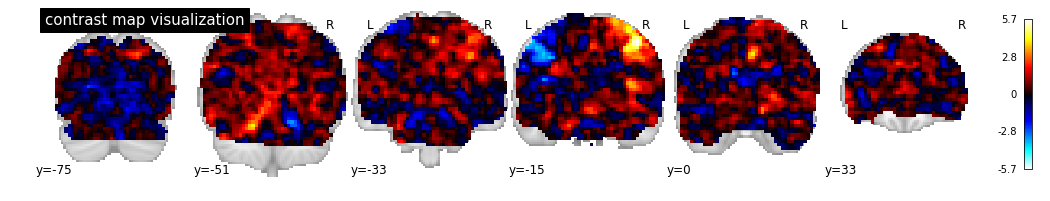

In [23]:
plotting.plot_stat_map(subject1_tmap, display_mode='y', cut_coords=6, title="contrast map visualization")

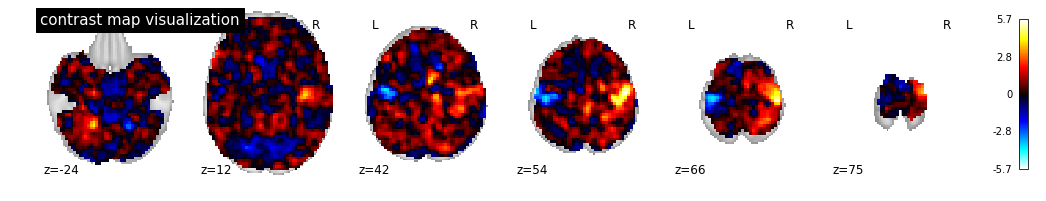

In [24]:
plotting.plot_stat_map(subject1_tmap, display_mode='z', cut_coords=6, title="contrast map visualization")

### Plotting a connectome

A connectome is a  map of neural connections in the brain, and may be thought of as its "wiring diagram".

In [25]:
from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True, memory='nilearn_cache', verbose=5)
time_series = masker.fit_transform(func1)


[NiftiMapsMasker.fit_transform] loading regions from /Users/agleontiev/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]    0.1s, 0.0min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


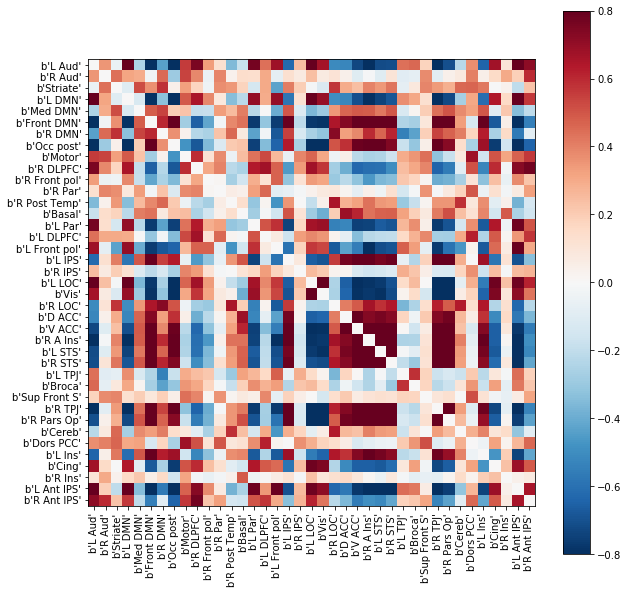

In [26]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
# Display the correlation matrix
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plt.imshow(correlation_matrix, interpolation="nearest", cmap="RdBu_r", vmax=0.8, vmin=-0.8)
plt.colorbar()
# And display the labels
x_ticks = plt.xticks(range(len(labels)), labels, rotation=90)
y_ticks = plt.yticks(range(len(labels)), labels)

Plotting connectome on the brain:

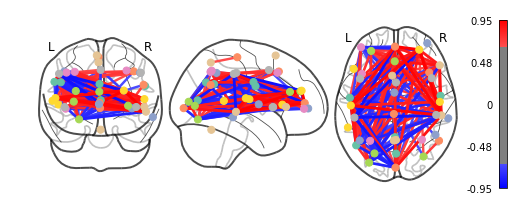

In [27]:
#coordinates of nodes
coords = atlas.region_coords
# We threshold to keep only the 20% of edges with the highest value
plotting.plot_connectome(correlation_matrix, coords, edge_threshold="80%", colorbar=True)

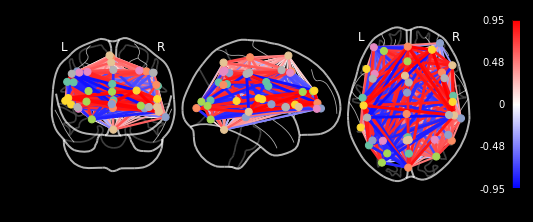

In [41]:
coords = atlas.region_coords
# We threshold to keep only the 5% of edges with the highest value
plotting.plot_connectome(correlation_matrix, coords, edge_threshold="0%", colorbar=True, black_bg=True, alpha = 0.5)

### EPI images and smoothing.
While MRI as conventionally practiced builds up the data for an image from a series of discrete signal samples, EPI is a method to form a complete image from a single data sample, or a single "shot".
Smoothing is necessary to control for anatomic individual differences and possible artifacts during data collection.
It is also important to help with anisotropy - when one voxel is bigger than another.

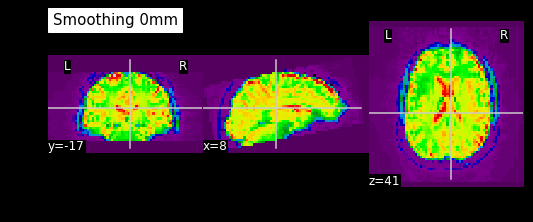

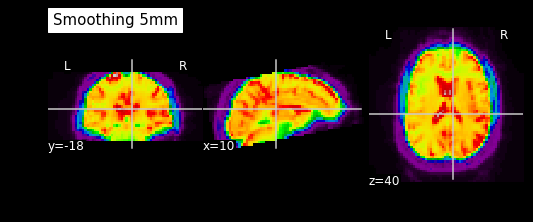

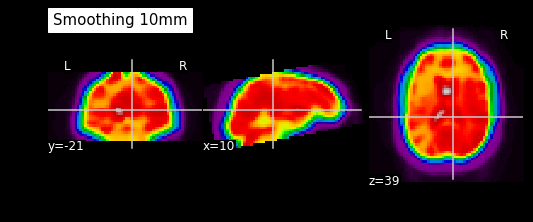

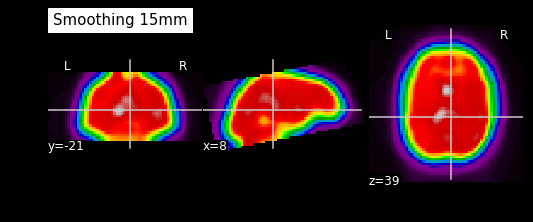

In [28]:
#create a mean image of all activations (mean of all time series)
mean_func = image.mean_img(func1)
# Then we smooth, with a varying amount of smoothing, from none to 20mm
# by increments of 5mm
for smoothing in range(0, 20, 5):
    smoothed_img = image.smooth_img(mean_func, smoothing)
    plotting.plot_epi(smoothed_img, title="Smoothing %imm" % smoothing)

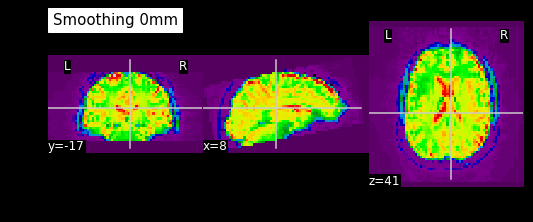

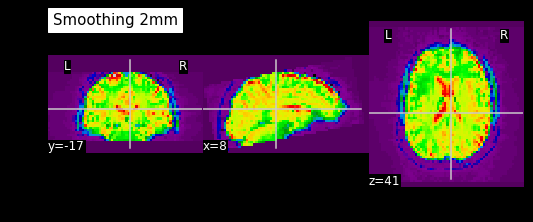

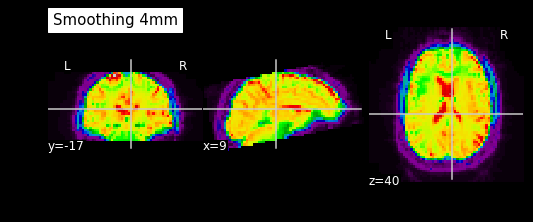

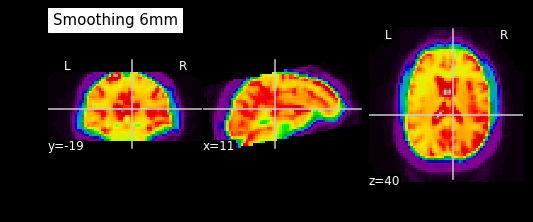

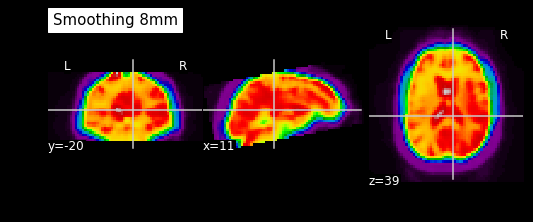

In [33]:
mean_func = image.mean_img(func1)
# Then we smooth, with a varying amount of smoothing, from none to 10mm
# by increments of 2mm
for smoothing in range(0, 10, 2):
    smoothed_img = image.smooth_img(mean_func, smoothing)
    plotting.plot_epi(smoothed_img, title="Smoothing %imm" % smoothing)

## Saving to a file

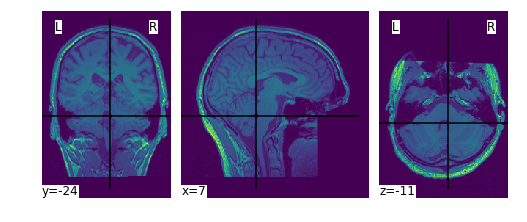

In [37]:
plotting.plot_connectome(correlation_matrix, coords, edge_threshold="80%", colorbar=True, output_file='pretty_brain1.png')
#In this case, the display is closed automatically and the plotting function returns None.
#The display object returned by the plotting function has a savefig method that can be used to save the plot to an image file:
display = plotting.plot_img(anat_example)
display.savefig('pretty_brain.png')     